<a href="https://colab.research.google.com/github/AndreiAf02/Job_Satisfaction_Burnout/blob/main/Job_Satisfaction_CZ_Multi_Group_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install semopy

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import semopy
import math
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from scipy.stats import bootstrap, norm
from semopy.multigroup import multigroup
import pymc as pm

## Data Preprocessing:

In [ ]:
# path_to_data = 'https://raw.githubusercontent.com/EduardoAve/Labour-well-being/refs/heads/main/data/02_processed/'
path_to_data2 = 'https://raw.githubusercontent.com/EduardoAve/Labour-well-being/refs/heads/main/data/01_raw-00/'

In [ ]:
data_total = pd.read_csv(path_to_data2+ "Final_Dataset.csv", sep=",", header=0)
data_total.columns = data_total.columns.str.replace(".","")
data_total

,Country,Version,1 Gender:,2 Age (in years):,Unnamed: 4,3 Nationality:,4 Current marital (partnership) status:,5 Do you currently care for underage children or dependent relatives?,6 The type of higher education insitution where you primarily work:,7 Subject area of the faculty (higher education institution) where you primarily work:,...,36 I tend to overwork,37 I don’t consider my work to be finished until I am completely satisfied with the result,38 My thoughts revolve around work almost exclusively,"39 When I’m unsuccessful at work, it makes me feel very down","40 If I don’t succeed at something, that just makes me all the more determined",41 I can be calm and collected in almost all situations,42 My life up till now has been characterized by professional success,"43 By and large, I am happy and content",44 I have the full support of my family,Vulnerability
0,2,4,2.0,28.0,2.0,Spanish,3.0,1.0,1.0,1.0,...,4.0,4.0,3.0,4.0,1.0,4.0,1.0,3.0,5.0,4.0
1,2,4,1.0,33.0,2.0,German,2.0,1.0,1.0,3.0,...,5.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,5.0,4.0
2,2,4,2.0,32.0,2.0,Kosovan,3.0,1.0,NaN,5.0,...,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,5.0,3.0
3,2,4,NaN,30.0,2.0,Spain,2.0,1.0,1.0,5.0,...,4.0,5.0,1.0,5.0,2.0,4.0,2.0,3.0,3.0,4.0
4,2,4,1.0,39.0,2.0,Italian,2.0,2.0,1.0,5.0,...,5.0,5.0,3.0,3.0,3.0,2.0,4.0,4.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,1,1,1.0,27.0,4.0,NaN,2.0,1.0,4.0,1.0,...,2.0,4.0,2.0,3.0,2.0,3.0,4.0,3.0,4.0,2.0
2743,1,1,1.0,80.0,3.0,NaN,1.0,1.0,4.0,6.0,...,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN
2744,1,1,2.0,27.0,6.0,NaN,3.0,1.0,4.0,3.0,...,2.0,3.0,1.0,1.0,3.0,3.0,5.0,5.0,3.0,2.0
2745,1,1,2.0,28.0,4.0,NaN,3.0,1.0,4.0,1.0,...,5.0,4.0,4.0,4.0,3.0,3.0,3.0,1.0,4.0,NaN


In [ ]:
print(data_total.columns.tolist())

['Country', 'Version', '1 Gender:', '2 Age (in years):', 'Unnamed: 4', '3 Nationality:', '4 Current marital (partnership) status:', '5 Do you currently care for underage children or dependent relatives?', '6 The type of higher education insitution where you primarily work:', '7 Subject area of the faculty (higher education institution) where you primarily work:', '8 Duration of your current employment contract at the higher education institution where you primarily work:', '9 Extent of employment in higher education (in hours/week, aggregated for all higher education institutions where you work):', '10 Actual average weekly working hours in higher education (in a typical semester week):', 'Effort (less, more, equal)', 'Effort [%]', 'Income CZK', 'Income EURO', 'Euro Adj', 'Salary/hour', 'Salary effort/hour', '12 Do you hold a leadership position at a higher education institution?', '13 How influential are you in helping to shape key academic policies at your institution at the level of

In [ ]:
data_at_total = data_total[data_total['Country']==1].reset_index(drop=True)
data_cz_total = data_total[data_total['Country']==2].reset_index(drop=True)
data_cz_total

,Country,Version,1 Gender:,2 Age (in years):,Unnamed: 4,3 Nationality:,4 Current marital (partnership) status:,5 Do you currently care for underage children or dependent relatives?,6 The type of higher education insitution where you primarily work:,7 Subject area of the faculty (higher education institution) where you primarily work:,...,36 I tend to overwork,37 I don’t consider my work to be finished until I am completely satisfied with the result,38 My thoughts revolve around work almost exclusively,"39 When I’m unsuccessful at work, it makes me feel very down","40 If I don’t succeed at something, that just makes me all the more determined",41 I can be calm and collected in almost all situations,42 My life up till now has been characterized by professional success,"43 By and large, I am happy and content",44 I have the full support of my family,Vulnerability
0,2,4,2.0,28.0,2.0,Spanish,3.0,1.0,1.0,1.0,...,4.0,4.0,3.0,4.0,1.0,4.0,1.0,3.0,5.0,4.0
1,2,4,1.0,33.0,2.0,German,2.0,1.0,1.0,3.0,...,5.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,5.0,4.0
2,2,4,2.0,32.0,2.0,Kosovan,3.0,1.0,NaN,5.0,...,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,5.0,3.0
3,2,4,NaN,30.0,2.0,Spain,2.0,1.0,1.0,5.0,...,4.0,5.0,1.0,5.0,2.0,4.0,2.0,3.0,3.0,4.0
4,2,4,1.0,39.0,2.0,Italian,2.0,2.0,1.0,5.0,...,5.0,5.0,3.0,3.0,3.0,2.0,4.0,4.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,2,2,1.0,57.0,1.0,NaN,1.0,1.0,1.0,9.0,...,2.0,2.0,2.0,4.0,4.0,5.0,4.0,4.0,4.0,1.0
1415,2,2,1.0,40.0,1.0,NaN,2.0,1.0,1.0,5.0,...,2.0,4.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0,2.0
1416,2,2,2.0,29.0,2.0,Slovenská republika,2.0,1.0,1.0,3.0,...,4.0,4.0,3.0,5.0,4.0,2.0,3.0,3.0,5.0,3.0
1417,2,2,2.0,50.0,1.0,NaN,1.0,1.0,1.0,9.0,...,4.0,3.0,1.0,1.0,NaN,NaN,NaN,5.0,4.0,NaN


In [ ]:
data_cz_job = data_cz_total[['1 Gender:', '2 Age (in years):',
    'CZ_15 Your current position at the higher education institution, where you primarily work: ', ## Current Position
    'Salary/hour',
    # '8 Duration of your current employment contract at the higher education institution where you primarily work:', ## Contract Duration
    '10 Actual average weekly working hours in higher education (in a typical semester week):', ## Actual Weekly Working Hours
    'Effort [%]', ## Effort = actual hours/contract hours
    '1 Teaching (classroom instruction, preparation of instructional materials and lesson plans, advising students, reading and evaluating student work, examination management, etc)', ## Teaching hours
    '2 Research (reading literature, designing and conducting experiments, collecting and analysing data, writing articles or other scientific texts, etc)', ## Research Hours
    '3 Activities related to externally funded research projects (searching for information on available funding sources, preparation of grant applications and project reports, project management and administration, etc)', ## Research Admin hours
    '4 Organisational and administrative activities (organising and attending meetings, dealing with tasks and documents not directly related to teaching, research, or externally funded research projects, etc)', ## General Admin hours
    # '12 Do you hold a leadership position at a higher education institution?', ## Leadership position
    '13 How influential are you in helping to shape key academic policies at your institution at the level of department or similar unit?', ## Policy Influence
    ## ACADEMIC RESOURCES:
    '1 Facilities and technological equipment (offices, classrooms, laboratories, computers, projectors, teaching software)', ## Academic Resources - FACILITIES
    '2 Research equipment (instruments, tools, materials, software for working with data)', ## Academic Resources - RESEARCH EQUIP
    '3 Availability of scientific literature (access to up-to-date scientific articles and books)', ## Academic Resources - LITERATURE
    '4 Personnel support (support from secretarial, administrative and technical staff, laboratory technicians, etc)', ## Academic Resources - SUPPORT
    '5 Opportunities for personal and professional development (offer and availability of professional courses and internships, opportunities to participate at conferences and other professional events)', ## Academic Resources - PD
    '6 Availability of resources for research funding', ## Academic Resources - FUNDING
    ## PERFORMANCE PRESSURE:
    # '1 At my institution, there is a strong performance orientation',
    ## PERCEIVED AUTONOMY:
    '2 I feel like I can be myself at my job', ## KEEP ORDER
    "3 At work, I often feel like I have to follow other people’s commands", ## TO INVERT
    '4 If I could choose, I would do things at work differently', ## TO INVERT
    '5 The tasks I have to do at work are in line with what I really want to do', ## KEEP ORDER
    '6 I feel free to do my job the way I think it could best be done', ## KEEP ORDER
    '7 In my job, I feel forced to do things I do not want to do ', ## TO INVERT
    ## QUALITY OF LEADERSHIP:
    # '1  makes sure that the members of staff have good development opportunities', ## KEEP ORDER
    # '2  gives high priority to job satisfaction', ## KEEP ORDER
    # '3  is good at work planning', ## KEEP ORDER
    # '4  is good at solving conflicts ', ## KEEP ORDER
    ## SENSE OF COMMUNITY:
    # '1 There is a good atmosphere between myself and my colleagues ',
    # '2 There is good co-operation between the colleagues at work',
    # '3 I feel part of a community at my place of work',
    ## JOB SATISFACTION:
    '1  your work prospects? ',
    '2   the physical working conditions (eg facilities, equipment, physical working environment)?',
    '3  the way your abilities are used?',
    '4  your salary?',
    '5  your job as a whole, everything taken into consideration? ',
    ## BURNOUT:
    '1 How often have you felt worn out?',
    '2 How often have you been physically exhausted?',
    '3 How often have you been emotionally exhausted?',
    '4 How often have you felt tired?'
]]

In [ ]:
data_cz_job.columns.tolist()

['1 Gender:',
 '2 Age (in years):',
 'CZ_15 Your current position at the higher education institution, where you primarily work: ',
 'Salary/hour',
 '10 Actual average weekly working hours in higher education (in a typical semester week):',
 'Effort [%]',
 '1 Teaching (classroom instruction, preparation of instructional materials and lesson plans, advising students, reading and evaluating student work, examination management, etc)',
 '2 Research (reading literature, designing and conducting experiments, collecting and analysing data, writing articles or other scientific texts, etc)',
 '3 Activities related to externally funded research projects (searching for information on available funding sources, preparation of grant applications and project reports, project management and administration, etc)',
 '4 Organisational and administrative activities (organising and attending meetings, dealing with tasks and documents not directly related to teaching, research, or externally funded resear

In [ ]:
data_cz_job.columns = ['Gender', 'Age',
    'Current_position', ## Current Position
    'Salary',
    # 'Contract_duration', ## Contract Duration
    'Actual_hrs', ## Actual Weekly Working Hours
    'Effort', ## Effort = actual hours/contract hours
    'Teaching_hrs', ## Teaching hours
    'Research_hrs', ## Research Hours
    'External_funding_hrs', ## External Research Funding hours
    'Admin_hrs', ## General Admin hours
    # 'Leadership_position', ## Leadership position
    'Policy_influence', ## Policy Influence
    ## ACADEMIC RESOURCES:
    'Acad_res_facility', ## Academic Resources - FACILITIES
    'Acad_res_equip', ## Academic Resources - RESEARCH EQUIP
    'Acad_res_lit', ## Academic Resources - LITERATURE
    'Acad_res_support', ## Academic Resources - SUPPORT
    'Acad_res_PD', ## Academic Resources - PD
    'Acad_res_funding', ## Academic Resources - FUNDING
    ## PERFORMANCE PRESSURE:
    # 'Performance_pressure',
    ## PERCEIVED AUTONOMY:
    'Be_myself', ## KEEP ORDER
    "Follow_commands", ## TO INVERT
    'Do_differently', ## TO INVERT
    'Want_to_do', ## KEEP ORDER
    'Done_best', ## KEEP ORDER
    'Forced_to_do', ## TO INVERT
    ## QUALITY OF LEADERSHIP:
    # 'Development_opportunities', ## KEEP ORDER
    # 'Prioritizes_satisfaction', ## KEEP ORDER
    # 'Work_planning', ## KEEP ORDER
    # 'Solving_conflicts', ## KEEP ORDER
    ## SENSE OF COMMUNITY:
    # 'Good_atmosphere',
    # 'Good_cooperation',
    # 'Part_of_community',
    ## JOB SATISFACTION:
    'Work_prospects',
    'Physical_working_conditions',
    'Use_of_abilities',
    'Satisfaction_w_salary',
    'Overall_satisfaction',
    ## BURNOUT:
    'Worn_out',
    'Physically_exhausted',
    'Emotionally_exhausted',
    'Felt_tired']

In [ ]:
data_cz_job.columns.tolist()

['Gender',
 'Age',
 'Current_position',
 'Salary',
 'Actual_hrs',
 'Effort',
 'Teaching_hrs',
 'Research_hrs',
 'External_funding_hrs',
 'Admin_hrs',
 'Policy_influence',
 'Acad_res_facility',
 'Acad_res_equip',
 'Acad_res_lit',
 'Acad_res_support',
 'Acad_res_PD',
 'Acad_res_funding',
 'Be_myself',
 'Follow_commands',
 'Do_differently',
 'Want_to_do',
 'Done_best',
 'Forced_to_do',
 'Work_prospects',
 'Physical_working_conditions',
 'Use_of_abilities',
 'Satisfaction_w_salary',
 'Overall_satisfaction',
 'Worn_out',
 'Physically_exhausted',
 'Emotionally_exhausted',
 'Felt_tired']

In [ ]:
data_cz_job = data_cz_job[data_cz_job['Gender'].isin([1.,2.])]
data_cz_job = data_cz_job.dropna(subset=['Age', 'Current_position']).reset_index(drop=True) #'Leadership_position'
for col in data_cz_job.columns:
  data_cz_job[col] = data_cz_job[col].astype(str).str.replace(',', '.').astype(float)
data_cz_job.to_csv('data_cz_job.csv')
data_cz_job

,Gender,Age,Current_position,Salary,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Forced_to_do,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction,Worn_out,Physically_exhausted,Emotionally_exhausted,Felt_tired
0,2.0,28.0,3.0,9.613782,50.0,125.0,5.0,29.0,1.0,15.0,...,3.0,1.0,3.0,3.0,2.0,2.0,4.0,4.0,5.0,3.0
1,1.0,33.0,3.0,4.326923,50.0,125.0,5.0,30.0,5.0,10.0,...,4.0,3.0,4.0,2.0,1.0,2.0,4.0,4.0,4.0,4.0
2,2.0,32.0,3.0,NaN,1.5,100.0,NaN,NaN,NaN,NaN,...,1.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,5.0
3,1.0,39.0,4.0,7.931370,NaN,NaN,20.0,20.0,10.0,3.0,...,2.0,4.0,3.0,3.0,1.0,2.0,5.0,4.0,4.0,5.0
4,2.0,39.0,4.0,9.613782,40.0,100.0,33.0,10.0,6.0,2.5,...,1.0,4.0,5.0,2.0,1.0,2.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,2.0,45.0,4.0,8.652404,40.0,100.0,17.0,17.0,4.0,2.0,...,4.0,3.0,2.0,3.0,1.0,4.0,3.0,4.0,3.0,5.0
1373,1.0,57.0,6.0,12.017228,40.0,100.0,18.0,6.0,1.0,9.0,...,2.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0
1374,1.0,40.0,4.0,10.334816,40.0,100.0,22.0,6.0,4.0,8.0,...,2.0,4.0,4.0,4.0,4.0,4.0,2.0,2.0,3.0,4.0
1375,2.0,29.0,4.0,9.613782,40.0,100.0,5.0,1.0,1.0,1.0,...,3.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0


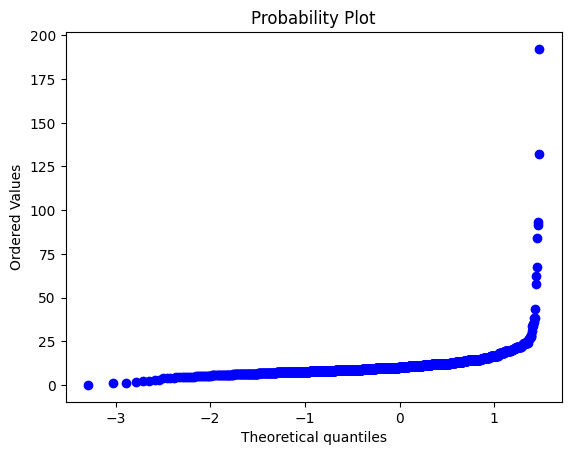

In [ ]:
# sm.qqplot(data_cz_job['Salary'], line='45')
stats.probplot(data_cz_job['Salary'], dist="norm", plot=plt)
# plt.hist(data_cz_job['Salary'])
plt.show()

In [ ]:
## Using the IQR to eliminate outliers for Salary, Average_hours, and Effort:

Q1_salary = data_cz_job['Salary'].quantile(0.25)
Q3_salary = data_cz_job['Salary'].quantile(0.75)
IQR_salary = Q3_salary - Q1_salary

lower_bound_salary = Q1_salary - 3. * IQR_salary
upper_bound_salary = Q3_salary + 2.8 * IQR_salary

Q1_hrs = data_cz_job['Actual_hrs'].quantile(0.25)
Q3_hrs = data_cz_job['Actual_hrs'].quantile(0.75)
IQR_hrs = Q3_hrs - Q1_hrs

lower_bound_hrs = Q1_hrs - 3. * IQR_hrs
upper_bound_hrs = Q3_hrs + 3. * IQR_hrs

Q1_effort = data_cz_job['Effort'].quantile(0.25)
Q3_effort = data_cz_job['Effort'].quantile(0.75)
IQR_effort = Q3_effort - Q1_effort

lower_bound_effort = Q1_effort - 3.  * IQR_effort
upper_bound_effort = Q3_effort + 3. * IQR_effort




data_cz_job = data_cz_job[(data_cz_job['Salary'] > lower_bound_salary) & (data_cz_job['Salary'] < upper_bound_salary) &
                          (data_cz_job['Actual_hrs'] > lower_bound_hrs) & (data_cz_job['Actual_hrs'] < upper_bound_hrs) &
                           (data_cz_job['Effort'] > lower_bound_effort) & (data_cz_job['Effort'] < upper_bound_effort)].reset_index(drop=True)

data_cz_job

,Gender,Age,Current_position,Salary,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Forced_to_do,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction,Worn_out,Physically_exhausted,Emotionally_exhausted,Felt_tired
0,2.0,28.0,3.0,9.613782,50.0,125.0,5.0,29.0,1.0,15.0,...,3.0,1.0,3.0,3.0,2.0,2.0,4.0,4.0,5.0,3.0
1,1.0,33.0,3.0,4.326923,50.0,125.0,5.0,30.0,5.0,10.0,...,4.0,3.0,4.0,2.0,1.0,2.0,4.0,4.0,4.0,4.0
2,2.0,39.0,4.0,9.613782,40.0,100.0,33.0,10.0,6.0,2.5,...,1.0,4.0,5.0,2.0,1.0,2.0,5.0,5.0,5.0,5.0
3,2.0,44.0,4.0,13.699640,40.0,100.0,20.0,2.0,5.0,13.0,...,4.0,5.0,3.0,4.0,2.0,4.0,3.0,2.0,3.0,4.0
4,2.0,58.0,4.0,8.652404,20.0,100.0,3.0,1.0,NaN,0.5,...,1.0,4.0,5.0,4.0,1.0,4.0,3.0,2.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2.0,45.0,4.0,8.652404,40.0,100.0,17.0,17.0,4.0,2.0,...,4.0,3.0,2.0,3.0,1.0,4.0,3.0,4.0,3.0,5.0
1092,1.0,57.0,6.0,12.017228,40.0,100.0,18.0,6.0,1.0,9.0,...,2.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0
1093,1.0,40.0,4.0,10.334816,40.0,100.0,22.0,6.0,4.0,8.0,...,2.0,4.0,4.0,4.0,4.0,4.0,2.0,2.0,3.0,4.0
1094,2.0,29.0,4.0,9.613782,40.0,100.0,5.0,1.0,1.0,1.0,...,3.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0


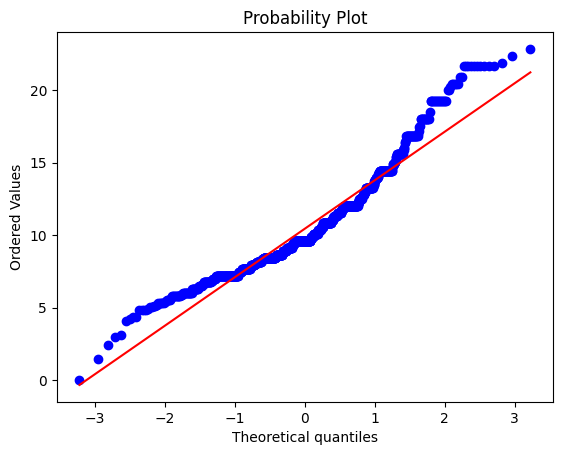

In [ ]:
stats.probplot(data_cz_job['Salary'], dist="norm", plot=plt)
# plt.hist(data_cz_job['Salary'])
plt.show()

In [ ]:
data_cz_job

,Gender,Age,Current_position,Salary,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Forced_to_do,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction,Worn_out,Physically_exhausted,Emotionally_exhausted,Felt_tired
0,2.0,28.0,3.0,9.613782,50.0,125.0,5.0,29.0,1.0,15.0,...,3.0,1.0,3.0,3.0,2.0,2.0,4.0,4.0,5.0,3.0
1,1.0,33.0,3.0,4.326923,50.0,125.0,5.0,30.0,5.0,10.0,...,4.0,3.0,4.0,2.0,1.0,2.0,4.0,4.0,4.0,4.0
2,2.0,39.0,4.0,9.613782,40.0,100.0,33.0,10.0,6.0,2.5,...,1.0,4.0,5.0,2.0,1.0,2.0,5.0,5.0,5.0,5.0
3,2.0,44.0,4.0,13.699640,40.0,100.0,20.0,2.0,5.0,13.0,...,4.0,5.0,3.0,4.0,2.0,4.0,3.0,2.0,3.0,4.0
4,2.0,58.0,4.0,8.652404,20.0,100.0,3.0,1.0,NaN,0.5,...,1.0,4.0,5.0,4.0,1.0,4.0,3.0,2.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2.0,45.0,4.0,8.652404,40.0,100.0,17.0,17.0,4.0,2.0,...,4.0,3.0,2.0,3.0,1.0,4.0,3.0,4.0,3.0,5.0
1092,1.0,57.0,6.0,12.017228,40.0,100.0,18.0,6.0,1.0,9.0,...,2.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0
1093,1.0,40.0,4.0,10.334816,40.0,100.0,22.0,6.0,4.0,8.0,...,2.0,4.0,4.0,4.0,4.0,4.0,2.0,2.0,3.0,4.0
1094,2.0,29.0,4.0,9.613782,40.0,100.0,5.0,1.0,1.0,1.0,...,3.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0


In [ ]:
## Interpolating the missing answer data using averages from each job position:
data_cz_job_interpolated = data_cz_job
data_cz_job_interpolated.columns

for i in range(len(data_cz_job_interpolated.columns)-3):
  for j in np.sort(data_cz_job_interpolated['Current_position'].unique()):
    interpolation = data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][data_cz_job_interpolated['Current_position']== j].mean()
    print('Interpolated Value:', interpolation)
    data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][(data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]].isna())
    & (data_cz_job_interpolated['Current_position']== j)] = interpolation #data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][data_cz_job_interpolated['Current_position']== j].mean()

data_cz_job_interpolated.to_csv('data_cz_job_interpolated.csv')
data_cz_job_interpolated



Interpolated Value: 1.0
Interpolated Value: 2.0
Interpolated Value: 3.0
Interpolated Value: 4.0
Interpolated Value: 5.0
Interpolated Value: 6.0
Interpolated Value: 7.0
Interpolated Value: 9.0
Interpolated Value: 9.266051992756836
Interpolated Value: 9.25288552662735
Interpolated Value: 8.875278634518736
Interpolated Value: 10.320503281722468
Interpolated Value: 13.27607971066414
Interpolated Value: 15.270072994827201
Interpolated Value: 9.570152866826898
Interpolated Value: 13.59663499306892
Interpolated Value: 39.738267148014444
Interpolated Value: 37.68421052631579
Interpolated Value: 40.09722222222222
Interpolated Value: 42.169099756691
Interpolated Value: 45.68214285714286
Interpolated Value: 44.70454545454545
Interpolated Value: 39.41203703703704
Interpolated Value: 47.666666666666664
Interpolated Value: 104.30829536989285
Interpolated Value: 108.75
Interpolated Value: 116.67231912144705
Interpolated Value: 114.17152788411914
Interpolated Value: 116.2200630252101
Interpolated Valu

/tmp/ipython-input-3438967378.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][(data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-343

Interpolated Value: 3.4473684210526314
Interpolated Value: 3.861111111111111
Interpolated Value: 3.6822660098522166
Interpolated Value: 3.6857142857142855
Interpolated Value: 3.2954545454545454
Interpolated Value: 3.3457943925233646
Interpolated Value: 4.166666666666667
Interpolated Value: 3.4584837545126352
Interpolated Value: 3.5
Interpolated Value: 3.25
Interpolated Value: 3.2860635696821516
Interpolated Value: 3.5
Interpolated Value: 3.8863636363636362
Interpolated Value: 3.588785046728972
Interpolated Value: 2.8333333333333335
Interpolated Value: 3.5415162454873648
Interpolated Value: 3.6052631578947367
Interpolated Value: 3.25
Interpolated Value: 3.444987775061125
Interpolated Value: 3.4857142857142858
Interpolated Value: 3.953488372093023
Interpolated Value: 3.6666666666666665
Interpolated Value: 3.0
Interpolated Value: 2.7256317689530687
Interpolated Value: 2.5526315789473686
Interpolated Value: 2.8194444444444446
Interpolated Value: 2.951219512195122
Interpolated Value: 3.0571

/tmp/ipython-input-3438967378.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][(data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-343

,Gender,Age,Current_position,Salary,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Forced_to_do,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction,Worn_out,Physically_exhausted,Emotionally_exhausted,Felt_tired
0,2.0,28.0,3.0,9.613782,50.0,125.0,5.0,29.0,1.000000,15.0,...,3.0,1.0,3.0,3.0,2.0,2.0,4.0,4.0,5.0,3.0
1,1.0,33.0,3.0,4.326923,50.0,125.0,5.0,30.0,5.000000,10.0,...,4.0,3.0,4.0,2.0,1.0,2.0,4.0,4.0,4.0,4.0
2,2.0,39.0,4.0,9.613782,40.0,100.0,33.0,10.0,6.000000,2.5,...,1.0,4.0,5.0,2.0,1.0,2.0,5.0,5.0,5.0,5.0
3,2.0,44.0,4.0,13.699640,40.0,100.0,20.0,2.0,5.000000,13.0,...,4.0,5.0,3.0,4.0,2.0,4.0,3.0,2.0,3.0,4.0
4,2.0,58.0,4.0,8.652404,20.0,100.0,3.0,1.0,4.512438,0.5,...,1.0,4.0,5.0,4.0,1.0,4.0,3.0,2.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2.0,45.0,4.0,8.652404,40.0,100.0,17.0,17.0,4.000000,2.0,...,4.0,3.0,2.0,3.0,1.0,4.0,3.0,4.0,3.0,5.0
1092,1.0,57.0,6.0,12.017228,40.0,100.0,18.0,6.0,1.000000,9.0,...,2.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0
1093,1.0,40.0,4.0,10.334816,40.0,100.0,22.0,6.0,4.000000,8.0,...,2.0,4.0,4.0,4.0,4.0,4.0,2.0,2.0,3.0,4.0
1094,2.0,29.0,4.0,9.613782,40.0,100.0,5.0,1.0,1.000000,1.0,...,3.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0


In [ ]:
## PERCEIVED AUTONOMY:
inversion_list = ['Follow_commands', ## TO INVERT
                  'Do_differently', ## TO INVERT
                  'Forced_to_do'] ## TO INVERT

data_cz_job_w_inversion = data_cz_job_interpolated


for col in inversion_list:
  print('Before:', col, ":", np.sort(data_cz_job_w_inversion[col].unique()))
  data_cz_job_w_inversion[col] = max(data_cz_job_w_inversion[col])+1 - data_cz_job_w_inversion[col]
  print(col, ":", np.sort(data_cz_job_w_inversion[col].unique()))

data_cz_job_w_inversion.to_csv('data_cz_job_w_inversion.csv')
data_cz_job_w_inversion



Before: Follow_commands : [1.         2.         3.         3.05365854 3.29454545 4.
 5.        ]
Follow_commands : [1.         2.         2.70545455 2.94634146 3.         4.
 5.        ]
Before: Do_differently : [1.         2.         3.         3.34579439 3.68226601 4.
 5.        ]
Do_differently : [1.         2.         2.31773399 2.65420561 3.         4.
 5.        ]
Before: Forced_to_do : [1.         2.         2.95121951 3.         4.         5.        ]
Forced_to_do : [1.         2.         3.         3.04878049 4.         5.        ]


,Gender,Age,Current_position,Salary,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Forced_to_do,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction,Worn_out,Physically_exhausted,Emotionally_exhausted,Felt_tired
0,2.0,28.0,3.0,9.613782,50.0,125.0,5.0,29.0,1.000000,15.0,...,3.0,1.0,3.0,3.0,2.0,2.0,4.0,4.0,5.0,3.0
1,1.0,33.0,3.0,4.326923,50.0,125.0,5.0,30.0,5.000000,10.0,...,2.0,3.0,4.0,2.0,1.0,2.0,4.0,4.0,4.0,4.0
2,2.0,39.0,4.0,9.613782,40.0,100.0,33.0,10.0,6.000000,2.5,...,5.0,4.0,5.0,2.0,1.0,2.0,5.0,5.0,5.0,5.0
3,2.0,44.0,4.0,13.699640,40.0,100.0,20.0,2.0,5.000000,13.0,...,2.0,5.0,3.0,4.0,2.0,4.0,3.0,2.0,3.0,4.0
4,2.0,58.0,4.0,8.652404,20.0,100.0,3.0,1.0,4.512438,0.5,...,5.0,4.0,5.0,4.0,1.0,4.0,3.0,2.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2.0,45.0,4.0,8.652404,40.0,100.0,17.0,17.0,4.000000,2.0,...,2.0,3.0,2.0,3.0,1.0,4.0,3.0,4.0,3.0,5.0
1092,1.0,57.0,6.0,12.017228,40.0,100.0,18.0,6.0,1.000000,9.0,...,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0
1093,1.0,40.0,4.0,10.334816,40.0,100.0,22.0,6.0,4.000000,8.0,...,4.0,4.0,4.0,4.0,4.0,4.0,2.0,2.0,3.0,4.0
1094,2.0,29.0,4.0,9.613782,40.0,100.0,5.0,1.0,1.000000,1.0,...,3.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0


In [ ]:
data_cz_formatted = data_cz_job_w_inversion

data_cz_formatted = data_cz_formatted.dropna(subset = ['Overall_satisfaction']).reset_index(drop=True)


## Calculating percentage hours for teaching and research:
data_cz_formatted['Teaching_percent'] = data_cz_formatted['Teaching_hrs']/data_cz_formatted[['Teaching_hrs', 'Research_hrs',
                                                                                             'External_funding_hrs', 'Admin_hrs']].sum(axis=1)*100
data_cz_formatted['Research_percent'] = data_cz_formatted['Research_hrs']/data_cz_formatted[['Teaching_hrs', 'Research_hrs',
                                                                                             'External_funding_hrs', 'Admin_hrs']].sum(axis=1)*100
data_cz_formatted = data_cz_formatted.drop(['Teaching_hrs', 'Research_hrs', 'External_funding_hrs', 'Admin_hrs'], axis=1)


## Calculating average score for Academic Resources:
data_cz_formatted['Academic_Resources'] = data_cz_formatted[['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                                                             'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding']].mean(axis=1)
data_cz_formatted = data_cz_formatted.drop(['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                        'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding'], axis=1)


## Calculating average score for Perceived Autonomy:
data_cz_formatted['Perceived_Autonomy'] = data_cz_formatted[['Be_myself', "Follow_commands", 'Do_differently',
                                                             'Want_to_do', 'Done_best', 'Forced_to_do']].mean(axis=1)
data_cz_formatted = data_cz_formatted.drop(['Be_myself', "Follow_commands", 'Do_differently',
                        'Want_to_do', 'Done_best', 'Forced_to_do'], axis=1)


# Calculating average score for Burnout:
data_cz_formatted['Burnout'] = data_cz_formatted[['Worn_out', 'Physically_exhausted',
                                                  'Emotionally_exhausted', 'Felt_tired']].mean(axis=1)
data_cz_formatted = data_cz_formatted.drop(['Worn_out', 'Physically_exhausted',
                                            'Emotionally_exhausted', 'Felt_tired'],axis=1)


## Calculating average score for Leadership quality:
# data_cz_formatted['Leadership_quality'] = data_cz_formatted[['Development_opportunities', 'Prioritizes_satisfaction',
#                                                              'Work_planning', 'Solving_conflicts']].mean(axis=1)
# data_cz_formatted = data_cz_formatted.drop(['Development_opportunities', 'Prioritizes_satisfaction',
#                                                              'Work_planning', 'Solving_conflicts'],axis=1)


## Calculating average score for sense of community:
# data_cz_formatted['Sense_of_community'] = data_cz_formatted[['Good_atmosphere', 'Good_cooperation',
#                                                              'Part_of_community']].mean(axis=1)
# data_cz_formatted = data_cz_formatted.drop(['Good_atmosphere', 'Good_cooperation', 'Part_of_community'], axis=1)

## Calculating average score for job satisfaction:
data_cz_formatted['Job_satisfaction'] = data_cz_formatted[['Work_prospects', 'Physical_working_conditions',
                                                           'Use_of_abilities', 'Satisfaction_w_salary',
                                                           'Overall_satisfaction']].mean(axis=1)
data_cz_formatted = data_cz_formatted.drop(['Work_prospects', 'Physical_working_conditions',
                        'Use_of_abilities', 'Satisfaction_w_salary',
                        'Overall_satisfaction'],axis=1)


data_cz_formatted.to_csv('data_cz_formatted.csv')
print(data_cz_formatted.columns.tolist())

['Gender', 'Age', 'Current_position', 'Salary', 'Actual_hrs', 'Effort', 'Policy_influence', 'Teaching_percent', 'Research_percent', 'Academic_Resources', 'Perceived_Autonomy', 'Burnout', 'Job_satisfaction']


In [ ]:
data_cz_formatted

,Gender,Age,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Burnout,Job_satisfaction
0,2.0,28.0,3.0,9.613782,50.0,125.0,1.0,10.000000,58.000000,3.166667,1.833333,4.00,2.2
1,1.0,33.0,3.0,4.326923,50.0,125.0,1.0,10.000000,60.000000,3.000000,1.500000,4.00,2.4
2,2.0,39.0,4.0,9.613782,40.0,100.0,2.0,64.077670,19.417476,4.000000,4.500000,5.00,2.8
3,2.0,44.0,4.0,13.699640,40.0,100.0,5.0,50.000000,5.000000,3.166667,3.333333,3.00,3.6
4,2.0,58.0,4.0,8.652404,20.0,100.0,3.0,33.287331,11.095777,3.115325,4.166667,2.25,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2.0,45.0,4.0,8.652404,40.0,100.0,1.0,42.500000,42.500000,3.833333,2.666667,3.75,2.6
1092,1.0,57.0,6.0,12.017228,40.0,100.0,5.0,52.941176,17.647059,3.833333,4.333333,3.00,4.0
1093,1.0,40.0,4.0,10.334816,40.0,100.0,4.0,55.000000,15.000000,3.833333,4.000000,2.75,4.0
1094,2.0,29.0,4.0,9.613782,40.0,100.0,1.0,62.500000,12.500000,3.166667,3.500000,3.25,3.4


In [ ]:
## Taking only academic seniority positions:

# data_cz_formatted_academic = data_cz_formatted[~data_cz_formatted['Current_position'].isin([1., 9.])]
data_cz_formatted_academic = data_cz_formatted[data_cz_formatted['Current_position'].isin([3., 4., 5., 6.])]

np.sort(data_cz_formatted_academic['Current_position'].unique())

array([3., 4., 5., 6.])

In [ ]:
data_cz_formatted_academic['Age_centered'] = data_cz_formatted_academic['Age'] - data_cz_formatted_academic['Age'].mean()

/tmp/ipython-input-618497643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cz_formatted_academic['Age_centered'] = data_cz_formatted_academic['Age'] - data_cz_formatted_academic['Age'].mean()


In [ ]:
data_cz_formatted_academic.to_csv('data_cz_formatted_seniority.csv')
data_cz_formatted_academic

,Gender,Age,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Burnout,Job_satisfaction,Age_centered
0,2.0,28.0,3.0,9.613782,50.0,125.0,1.0,10.000000,58.000000,3.166667,1.833333,4.00,2.2,-16.947526
1,1.0,33.0,3.0,4.326923,50.0,125.0,1.0,10.000000,60.000000,3.000000,1.500000,4.00,2.4,-11.947526
2,2.0,39.0,4.0,9.613782,40.0,100.0,2.0,64.077670,19.417476,4.000000,4.500000,5.00,2.8,-5.947526
3,2.0,44.0,4.0,13.699640,40.0,100.0,5.0,50.000000,5.000000,3.166667,3.333333,3.00,3.6,-0.947526
4,2.0,58.0,4.0,8.652404,20.0,100.0,3.0,33.287331,11.095777,3.115325,4.166667,2.25,3.6,13.052474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2.0,45.0,4.0,8.652404,40.0,100.0,1.0,42.500000,42.500000,3.833333,2.666667,3.75,2.6,0.052474
1092,1.0,57.0,6.0,12.017228,40.0,100.0,5.0,52.941176,17.647059,3.833333,4.333333,3.00,4.0,12.052474
1093,1.0,40.0,4.0,10.334816,40.0,100.0,4.0,55.000000,15.000000,3.833333,4.000000,2.75,4.0,-4.947526
1094,2.0,29.0,4.0,9.613782,40.0,100.0,1.0,62.500000,12.500000,3.166667,3.500000,3.25,3.4,-15.947526


Current_position
3.0     72
4.0    411
5.0    140
6.0     44
Name: count, dtype: int64


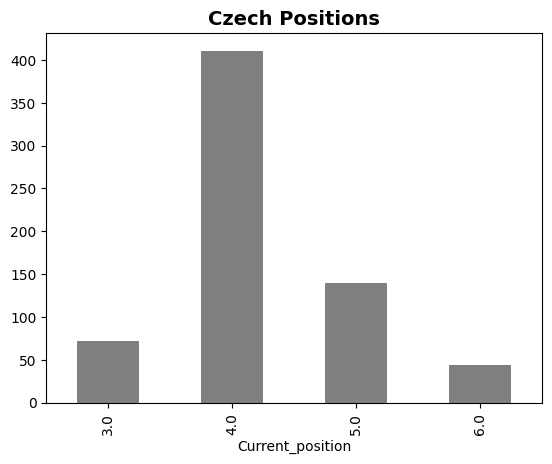

In [ ]:
# plt.figure(dpi=600)
data_cz_formatted_academic['Current_position'].value_counts().sort_index().plot(kind='bar', color='gray')
plt.title('Czech Positions', fontsize=14, fontweight='bold')
print(data_cz_formatted_academic['Current_position'].value_counts().sort_index())

In [ ]:
## Creating dummy variables for the categorical variables Current Position, Contract Duration, and Leadership Position:

data_cz_formatted_academic = data_cz_formatted_academic.dropna().reset_index(drop=True)

data_cz_formatted_academic['Age'] = data_cz_formatted_academic['Age'] - data_cz_formatted_academic['Age'].mean()

data_cz_formatted_academic = data_cz_formatted_academic.astype(float)

Current_position_col = ['Current_position']
Working_condition_cols = [col for col in data_cz_formatted_academic.columns if col not in ['Job_satisfaction']+['Age']+Current_position_col]

## Calculating the interaction terms for Age moderator:
for col in Working_condition_cols:
  data_cz_formatted_academic[col+'_mod_Age'] = data_cz_formatted_academic[col] * data_cz_formatted_academic['Age']

data_cz_formatted_academic.to_csv('data_cz_formatted_academic.csv')

print(data_cz_formatted_academic.columns.tolist())
print(np.shape(data_cz_formatted_academic))

['Gender', 'Age', 'Current_position', 'Salary', 'Actual_hrs', 'Effort', 'Policy_influence', 'Teaching_percent', 'Research_percent', 'Academic_Resources', 'Perceived_Autonomy', 'Burnout', 'Job_satisfaction', 'Age_centered', 'Gender_mod_Age', 'Salary_mod_Age', 'Actual_hrs_mod_Age', 'Effort_mod_Age', 'Policy_influence_mod_Age', 'Teaching_percent_mod_Age', 'Research_percent_mod_Age', 'Academic_Resources_mod_Age', 'Perceived_Autonomy_mod_Age', 'Burnout_mod_Age', 'Age_centered_mod_Age']
(667, 25)


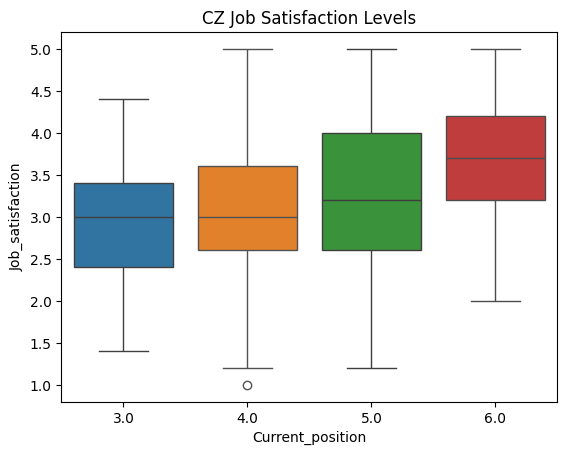

,Current Position,Job Satisfaction,Confidence Interval
0,3.0,2.888889,"[1.600, 4.245]"
1,4.0,3.033332,"[1.600, 4.600]"
2,5.0,3.267605,"[1.800, 4.800]"
3,6.0,3.704228,"[2.215, 4.800]"


In [ ]:
satisfaction = pd.DataFrame()
pos = []
satis = []
pbci = []

plt.figure()
for value in np.sort(data_cz_formatted_academic['Current_position'].unique()):
  pos.append(value)
  data = data_cz_formatted_academic[data_cz_formatted_academic['Current_position']==value]
  satis.append(data['Job_satisfaction'].mean())
  lbound = np.percentile(data['Job_satisfaction'], 2.5)
  ubound = np.percentile(data['Job_satisfaction'], 97.5)
  pbci.append(f'[{lbound:.3f}, {ubound:.3f}]')
  sns.boxplot(x='Current_position', y = 'Job_satisfaction', data = data)
plt.title('CZ Job Satisfaction Levels')
plt.show()



satisfaction['Current Position'] = pos
satisfaction['Job Satisfaction'] = satis
satisfaction['Confidence Interval'] = pbci
satisfaction


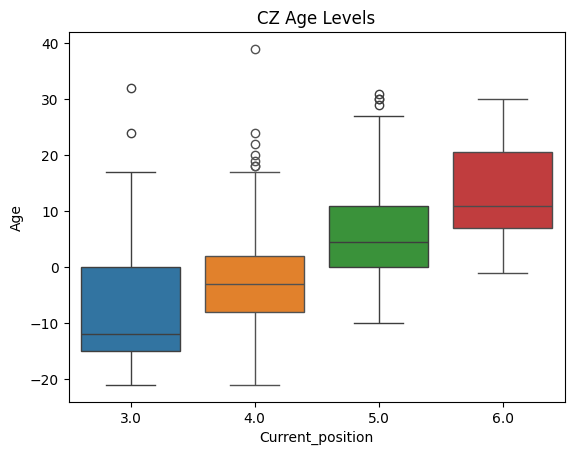

In [ ]:
plt.figure()
for value in np.sort(data_cz_formatted_academic['Current_position'].unique()):
  data = data_cz_formatted_academic[data_cz_formatted_academic['Current_position']==value]
  sns.boxplot(x='Current_position', y = 'Age', data = data)
plt.title('CZ Age Levels')
plt.show()

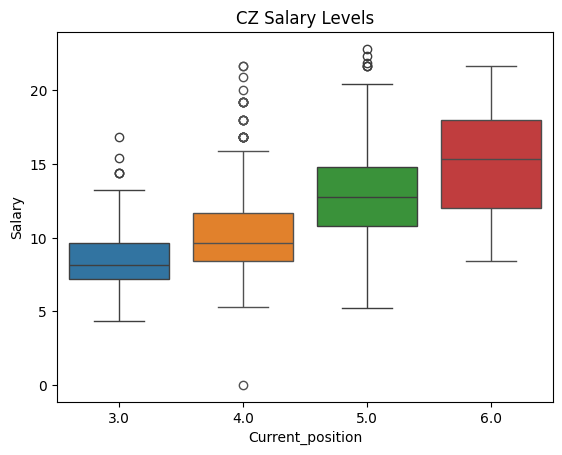

In [ ]:
plt.figure()
for value in np.sort(data_cz_formatted_academic['Current_position'].unique()):
  data = data_cz_formatted_academic[data_cz_formatted_academic['Current_position']==value]
  sns.boxplot(x='Current_position', y = 'Salary', data = data)
plt.title('CZ Salary Levels')
plt.show()

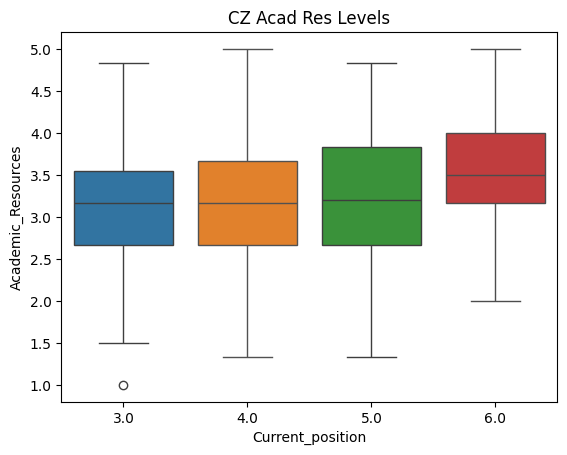

In [ ]:
plt.figure()
for value in np.sort(data_cz_formatted_academic['Current_position'].unique()):
  data = data_cz_formatted_academic[data_cz_formatted_academic['Current_position']==value]
  sns.boxplot(x='Current_position', y = 'Academic_Resources', data = data)
plt.title('CZ Acad Res Levels')
plt.show()

## Correlations and VIF Multicollinearity:

Text(0.5, 1.0, 'CZ Correlation Heatmap')

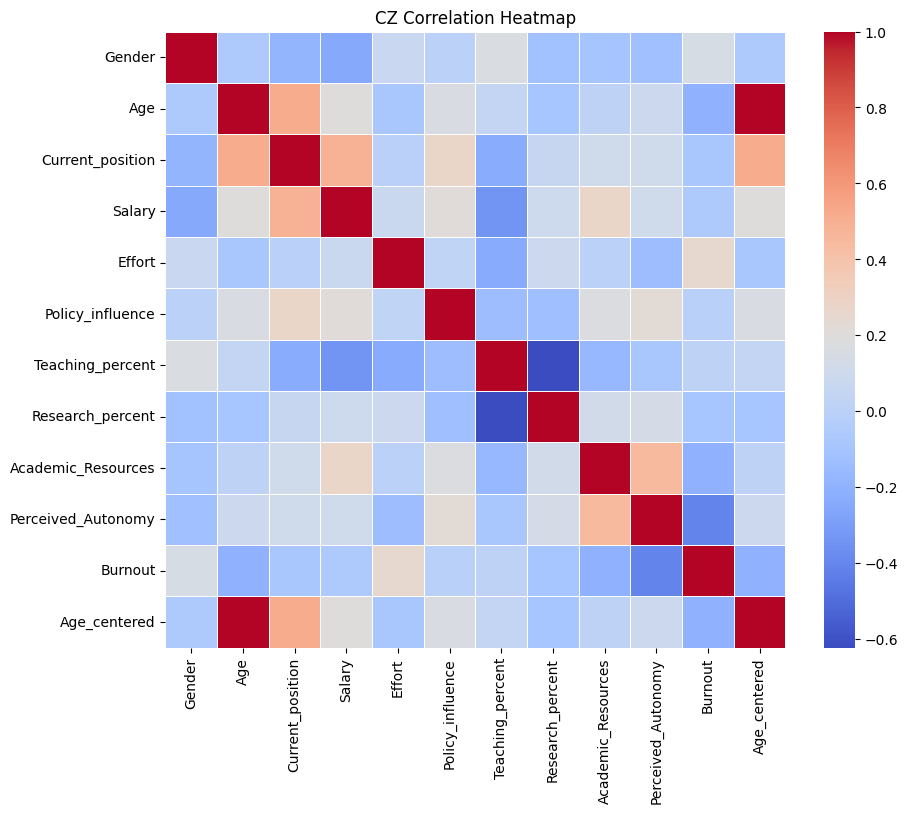

In [ ]:
corr_cols = [col for col in data_cz_formatted_academic.columns if 'mod_Age' not in col
             and 'Job_satisfaction' not in col and 'Actual_hrs' not in col]
correlations = data_cz_formatted_academic[corr_cols].corr()

plt.figure(figsize=(10, 8)) #, dpi = 600)
sns.heatmap(correlations, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('CZ Correlation Heatmap')

In [ ]:
## Performing Variance Inflation Factor (VIF) analysis of the dataset:

Current_position_dummy_cols = [col for col in data_cz_formatted_academic.columns if 'Current_position' in col and 'mod_Age' not in col]
## Taking the moderation coefficients separately:
Moderation_cols = [col for col in data_cz_formatted_academic.columns if 'mod_Age' in col and 'Age_centered' not in col]
## Taking the remaining variables for working conditions:
Working_condition_cols = [col for col in data_cz_formatted_academic.columns if 'Age' not in col and
                          col not in ['Job_satisfaction']+['Age']+Current_position_dummy_cols+Moderation_cols]

for cols in [Current_position_dummy_cols, Working_condition_cols, Moderation_cols]:
  if cols == Current_position_dummy_cols:
    print('Current Position:')
  elif cols == Working_condition_cols:
    print('Working Conditions:')
  elif cols == Moderation_cols:
    print('Age-Moderated Working Conditions:')
  X = data_cz_formatted_academic[cols].copy()
  X_const = add_constant(X)
  vif_data = pd.DataFrame()
  vif_data['Variable'] = X_const.columns
  vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

  print(vif_data)
  print('----------------------------------------')

Current Position:
           Variable        VIF
0             const  35.014228
1  Current_position   1.000000
----------------------------------------
Working Conditions:
              Variable         VIF
0                const  155.224195
1               Gender    1.114012
2               Salary    1.314885
3           Actual_hrs    1.559814
4               Effort    1.506929
5     Policy_influence    1.251040
6     Teaching_percent    2.137160
7     Research_percent    1.884738
8   Academic_Resources    1.345856
9   Perceived_Autonomy    1.549330
10             Burnout    1.292125
----------------------------------------
Age-Moderated Working Conditions:
                      Variable        VIF
0                        const   1.101890
1               Gender_mod_Age  11.149162
2               Salary_mod_Age  15.038850
3           Actual_hrs_mod_Age  14.059941
4               Effort_mod_Age  25.316003
5     Policy_influence_mod_Age   7.893976
6     Teaching_percent_mod_Age   8.1898

## Calculating Cronbach's Alpha for the combined factors:

In [ ]:
def Cronbach_alpha_func(data, label):
  col_nr = data.shape[1]

  item_variances = np.var(data, axis=0, ddof=1)
  total_var = np.var(np.sum(data, axis=1), ddof=1)
  alpha_cronbach = (col_nr/(col_nr-1))*(1-(np.sum(item_variances)/total_var))

  print(f'{label} Cronbach Alpha:', alpha_cronbach)
  return alpha_cronbach

In [ ]:
## Academic Resources:

data_cz_for_alpha_academic = data_cz_job_w_inversion[(data_cz_job_w_inversion['Current_position'].isin([3., 4., 5., 6.]))].dropna() #&
                                                    #  (data_cz_job_w_inversion['Contract_duration']<5) &
                                                    #  (data_cz_job_w_inversion['Leadership_position']<4)].dropna()

values = data_cz_for_alpha_academic['Teaching_hrs']/data_cz_for_alpha_academic[['Teaching_hrs', 'Research_hrs', 'External_funding_hrs', 'Admin_hrs']].sum(axis=1)
data_cz_for_alpha_academic = data_cz_for_alpha_academic.drop(values[values.isna()].index)

print(len(data_cz_for_alpha_academic))

academic_resources_for_alpha = np.asarray(data_cz_for_alpha_academic[['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                         'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding']])

perceived_autonomy_for_alpha = np.asarray(data_cz_for_alpha_academic[['Be_myself', "Follow_commands", 'Do_differently',
                                                             'Want_to_do', 'Done_best', 'Forced_to_do']])

burnout_for_alpha = np.asarray(data_cz_for_alpha_academic[['Worn_out', 'Physically_exhausted',
                                                           'Emotionally_exhausted', 'Felt_tired']])

# leadership_quality_for_alpha = np.asarray(data_cz_for_alpha_academic[['Development_opportunities', 'Prioritizes_satisfaction',
#                                                              'Work_planning', 'Solving_conflicts']])

# sense_of_community_for_alpha = np.asarray(data_cz_for_alpha_academic[['Good_atmosphere', 'Good_cooperation', 'Part_of_community']])

job_satisfaction_for_alpha = np.asarray(data_cz_for_alpha_academic[['Work_prospects', 'Physical_working_conditions',
                                                                      'Use_of_abilities', 'Satisfaction_w_salary',
                                                                      'Overall_satisfaction']])


acad_res_cron_alpha = Cronbach_alpha_func(academic_resources_for_alpha, 'Academic Resources')
perc_auton_cron_alpha = Cronbach_alpha_func(perceived_autonomy_for_alpha, 'Perceived Autonomy')
burnout_cron_alpha = Cronbach_alpha_func(burnout_for_alpha, 'Burnout')
# lead_qual_cron_alpha = Cronbach_alpha_func(leadership_quality_for_alpha, 'Leadership Quality')
# sens_comm_cron_alpha = Cronbach_alpha_func(sense_of_community_for_alpha, 'Sense of Community')
print('---------------------')
job_sat_cron_alpha = Cronbach_alpha_func(job_satisfaction_for_alpha, 'Job Satisfaction')





663
Academic Resources Cronbach Alpha: 0.7860500129802809
Perceived Autonomy Cronbach Alpha: 0.8654488809738153
Burnout Cronbach Alpha: 0.8721622526740811
---------------------
Job Satisfaction Cronbach Alpha: 0.7811826030737858


## Structural Equation Modelling:

We study the relationship between academic position and job satisfaction, mediated by working conditions and moderated by age.

In [ ]:
## Taking the response variable (Job satisfaction), the moderator variable (Age), and the predictor variable(s) (Current Position):
Job_satisfaction_col = ['Job_satisfaction']
Age_col = ['Age', 'Actual_hrs']
Current_position_col = ['Current_position']

## Taking the moderation coefficients separately:
# Working_condition_cols = ['Salary', 'Effort', 'Teaching_percent', 'Research_percent', 'Academic_Resources',
#                           'Perceived_Autonomy', 'Policy_influence']
# Moderation_cols = [col+'_mod_Age' for col in Working_condition_cols] #
Moderation_cols = [col for col in data_cz_formatted_academic.columns if 'mod_Age' in col and 'Actual_hrs' not in col
                   and 'Burnout' not in col and 'Gender' not in col and 'Age_centered' not in col]

## Taking the remaining variables for working conditions:
Working_condition_cols = [col for col in data_cz_formatted_academic.columns if 'Age' not in col and 'Burnout' not in col and 'Gender' not in col and
                          col not in Job_satisfaction_col+Age_col+Current_position_col+Moderation_cols]

Working_condition_cols

['Salary',
 'Effort',
 'Policy_influence',
 'Teaching_percent',
 'Research_percent',
 'Academic_Resources',
 'Perceived_Autonomy']

In [ ]:
Current_position_col

['Current_position']

In [ ]:
Moderation_cols

['Salary_mod_Age',
 'Effort_mod_Age',
 'Policy_influence_mod_Age',
 'Teaching_percent_mod_Age',
 'Research_percent_mod_Age',
 'Academic_Resources_mod_Age',
 'Perceived_Autonomy_mod_Age']

In [ ]:
# Current_position_factors = " + ".join(Current_position_dummy_cols)
Working_condition_factors = " + ".join(Working_condition_cols)
Moderation_factors = " + ".join(Moderation_cols)


path_no_mod = f"""
Burnout ~ {Working_condition_factors}
Job_satisfaction ~ Burnout + {Working_condition_factors}
"""

path = f"""
Burnout ~ {Working_condition_factors} + {Moderation_factors}
Job_satisfaction ~ Burnout + {Working_condition_factors}
"""

# path = f"""
# Job_satisfaction ~ {Working_condition_factors} + {Moderation_factors}
# """




print('Mediation/Moderation Path Model Specification:')
print(path)
print('-----------------------------------')


Mediation/Moderation Path Model Specification:

Burnout ~ Salary + Effort + Policy_influence + Teaching_percent + Research_percent + Academic_Resources + Perceived_Autonomy + Salary_mod_Age + Effort_mod_Age + Policy_influence_mod_Age + Teaching_percent_mod_Age + Research_percent_mod_Age + Academic_Resources_mod_Age + Perceived_Autonomy_mod_Age
Job_satisfaction ~ Burnout + Salary + Effort + Policy_influence + Teaching_percent + Research_percent + Academic_Resources + Perceived_Autonomy 

-----------------------------------


In [ ]:
multigroup_results = multigroup(
    desc=path,
    data=data_cz_formatted_academic,
    group='Current_position'
)

In [ ]:
print("Multigroup Statistics:")
print(multigroup_results.stats)


print('-'*50)
print("\nParameter Estimates for Each Job Position:")

for curr_pos in np.sort(data_cz_formatted_academic['Current_position'].unique()):
  estimates = multigroup_results.estimates[curr_pos]
  print(f"Job Position {curr_pos} Estimates:")
  print(estimates)
  print('*-'*25)
  # estimates.to_csv(f'CZ_Multigroup_Coeff_Position_{curr_pos}.csv')


Multigroup Statistics:
{np.float64(3.0):        DoF  DoF Baseline      chi2  chi2 p-value  chi2 Baseline       CFI  \
Value  112           134  7.056841           1.0    1409.196423  1.082296   

            GFI      AGFI       NFI       TLI  RMSEA        AIC         BIC  \
Value  0.994992  0.994009  0.994992  1.098461      0  47.803977  102.443963   

         LogLik  
Value  0.098012  , np.float64(4.0):        DoF  DoF Baseline      chi2  chi2 p-value  chi2 Baseline       CFI  \
Value  112           134  5.646537           1.0    6550.555034  1.016575   

            GFI      AGFI       NFI       TLI  RMSEA        AIC        BIC  \
Value  0.999138  0.998969  0.999138  1.019831      0  47.972523  144.41876   

         LogLik  
Value  0.013739  , np.float64(5.0):        DoF  DoF Baseline      chi2  chi2 p-value  chi2 Baseline       CFI  \
Value  112           134  4.748674           1.0    2527.203881  1.044815   

            GFI      AGFI       NFI       TLI  RMSEA        AIC       

In [ ]:
position = 6.
data_for_analysis = data_cz_formatted_academic[data_cz_formatted_academic['Current_position']==position]

In [ ]:
model = semopy.Model(path)
result = model.fit(data_for_analysis)
print(result)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.253
Number of iterations: 31
Params: -0.046 0.009 0.070 -0.008 -0.022 0.089 -0.124 0.004 -0.000 -0.012 0.000 0.000 -0.008 -0.008 0.007 0.053 0.001 0.181 0.012 0.008 0.541 0.206 0.264 0.182


In [ ]:
## Evaluating the model fit:
if 'Optimization terminated successfully' in result.message:
    print('Optimization Successful')
    print('EVALUATION:')
    fit_evaluation = semopy.calc_stats(model)
    print(fit_evaluation.T)
    print('-'*25)

Optimization Successful
EVALUATION:
                     Value
DoF             112.000000
DoF Baseline    134.000000
chi2             11.143962
chi2 p-value      1.000000
chi2 Baseline  1001.259594
CFI               1.116293
GFI               0.988870
AGFI              0.986684
NFI               0.988870
TLI               1.139136
RMSEA             0.000000
AIC              47.493456
BIC              90.314008
LogLik            0.253272
-------------------------


In [ ]:
ins = model.inspect()
print(ins)
ins.to_csv(f'CZ_Model_Parameter_Values_position_{position}.csv')

                lval  op                        rval  Estimate  Std. Err  \
0            Burnout   ~                      Salary -0.045914  0.050857   
1            Burnout   ~                      Effort  0.009315  0.007386   
2            Burnout   ~            Policy_influence  0.069888  0.138284   
3            Burnout   ~            Teaching_percent -0.008167  0.009586   
4            Burnout   ~            Research_percent -0.022202  0.016634   
5            Burnout   ~          Academic_Resources  0.088794  0.369161   
6            Burnout   ~          Perceived_Autonomy -0.124046  0.271671   
7            Burnout   ~              Salary_mod_Age  0.004382  0.004025   
8            Burnout   ~              Effort_mod_Age -0.000201  0.000544   
9            Burnout   ~    Policy_influence_mod_Age -0.011701  0.010854   
10           Burnout   ~    Teaching_percent_mod_Age  0.000275  0.000721   
11           Burnout   ~    Research_percent_mod_Age  0.000330  0.001226   
12          

In [ ]:
print(ins[ins['p-value']<0.05])

                lval  op                rval  Estimate  Std. Err   z-value  \
15  Job_satisfaction   ~              Salary  0.052873  0.021919  2.412193   
17  Job_satisfaction   ~    Policy_influence  0.180762  0.063925  2.827746   
18  Job_satisfaction   ~    Teaching_percent  0.011778  0.005887  2.000520   
20  Job_satisfaction   ~  Academic_Resources  0.541356  0.128852  4.201386   
22           Burnout  ~~             Burnout  0.264078  0.056302  4.690416   
23  Job_satisfaction  ~~    Job_satisfaction  0.182279  0.038862  4.690416   

     p-value  
15  0.015857  
17  0.004688  
18  0.045444  
20  0.000027  
22  0.000003  
23  0.000003  


In [ ]:
significance = []

for i in range(len(ins)):
  if ins['p-value'].iloc[i] <= 0.001:
    significance.append('***')
  elif 0.001 < ins['p-value'].iloc[i] <= 0.01:
    significance.append('**')
  elif 0.01 < ins['p-value'].iloc[i] <= 0.05:
    significance.append('*')
  else:
    significance.append(' (n.s.)')

ins['Significance'] = significance

ins['Estimate w Significance'] = round(ins['Estimate'],5).astype(str) + ins['Significance']
ins

,lval,op,rval,Estimate,Std. Err,z-value,p-value,Significance,Estimate w Significance
0,Burnout,~,Salary,-0.045914,0.050857,-0.902795,0.366635,(n.s.),-0.04591 (n.s.)
1,Burnout,~,Effort,0.009315,0.007386,1.261132,0.207261,(n.s.),0.00932 (n.s.)
2,Burnout,~,Policy_influence,0.069888,0.138284,0.505394,0.613282,(n.s.),0.06989 (n.s.)
3,Burnout,~,Teaching_percent,-0.008167,0.009586,-0.851911,0.394264,(n.s.),-0.00817 (n.s.)
4,Burnout,~,Research_percent,-0.022202,0.016634,-1.334725,0.181966,(n.s.),-0.0222 (n.s.)
5,Burnout,~,Academic_Resources,0.088794,0.369161,0.240528,0.809921,(n.s.),0.08879 (n.s.)
6,Burnout,~,Perceived_Autonomy,-0.124046,0.271671,-0.456603,0.647957,(n.s.),-0.12405 (n.s.)
7,Burnout,~,Salary_mod_Age,0.004382,0.004025,1.088666,0.276301,(n.s.),0.00438 (n.s.)
8,Burnout,~,Effort_mod_Age,-0.000201,0.000544,-0.369381,0.711844,(n.s.),-0.0002 (n.s.)
9,Burnout,~,Policy_influence_mod_Age,-0.011701,0.010854,-1.078029,0.281021,(n.s.),-0.0117 (n.s.)


## Performing Sobel Test for path effects:

In [ ]:
Sobel_z_stat_df  = pd.DataFrame(columns = ['Path']+Working_condition_cols)
Sobel_p_val_df  = pd.DataFrame(columns = ['Path']+ Working_condition_cols)

# for curr_pos in Current_position_dummy_cols:
Sobel_z = ['Mediation']
Sobel_p = ['Mediation']
Sobel_z_mod = ['Moderation']
Sobel_p_mod = ['Moderation']
Sobel_z_dir_path = ['Direct Path']
Sobel_p_dir_path = ['Direct Path']
for work_cond in Working_condition_cols:
  print(work_cond)
  WC_B_mean = float(ins['Estimate'][(ins['rval']==work_cond) & (ins['lval']=='Burnout')].iloc[0])
  WC_B_std = float(ins['Std. Err'][(ins['rval']==work_cond) & (ins['lval']=='Burnout')].iloc[0])
  B_JS_mean = float(ins['Estimate'][(ins['rval']=='Burnout') & (ins['lval']=='Job_satisfaction')].iloc[0])
  B_JS_std = float(ins['Std. Err'][(ins['rval']=='Burnout') & (ins['lval']=='Job_satisfaction')].iloc[0])
  ## Calculating Sobel Z-value statistic:
  z_value = (WC_B_mean*B_JS_mean)/np.sqrt(WC_B_mean**2 * B_JS_std**2 + B_JS_mean**2 * WC_B_std**2)

  WC_B_mean_mod = float(ins['Estimate'][(ins['rval']==work_cond+'_mod_Age') & (ins['lval']=='Burnout')].iloc[0])
  WC_B_std_mod = float(ins['Std. Err'][(ins['rval']==work_cond+'_mod_Age') & (ins['lval']=='Burnout')].iloc[0])
  z_value_mod = (WC_B_mean_mod*B_JS_mean)/np.sqrt(WC_B_mean_mod**2 * B_JS_std**2 + B_JS_mean**2 * WC_B_std_mod**2)

  # for curr_pos in Current_position_dummy_cols:
  #   WC_B_mean_mod = float(ins['Estimate'][(ins['rval']==work_cond+'_mod_'+curr_pos) & (ins['lval']=='Burnout')].iloc[0])
  #   WC_B_std_mod = float(ins['Std. Err'][(ins['rval']==work_cond+'_mod_'+curr_pos) & (ins['lval']=='Burnout')].iloc[0])
  #   z_value_mod = (WC_B_mean_mod*B_JS_mean)/np.sqrt(WC_B_mean_mod**2 * B_JS_std**2 + B_JS_mean**2 * WC_B_std_mod**2)

  WC_JS_Dir_path_mean = float(ins['Estimate'][(ins['rval']==work_cond) & (ins['lval']=='Job_satisfaction')].iloc[0])
  z_value_dir_path = float(ins['z-value'][(ins['rval']==work_cond) & (ins['lval']=='Job_satisfaction')].iloc[0])
  p_value_dir_path = float(ins['p-value'][(ins['rval']==work_cond) & (ins['lval']=='Job_satisfaction')].iloc[0])
  if p_value_dir_path <= 0.001:
    sig_dir_path = '***'
  elif p_value_dir_path <= 0.01:
    sig_dir_path = '**'
  elif p_value_dir_path <= 0.05:
    sig_dir_path = '*'
  else:
    sig_dir_path = ' (n.s.)'
  Sobel_z_dir_path.append(str(round(WC_JS_Dir_path_mean,4))+sig_dir_path)
  Sobel_p_dir_path.append(p_value_dir_path)



  ## Calculating two-tailed Sobel p-value:
  p_value_two_tailed = 2 * norm.sf(abs(z_value))

  if p_value_two_tailed<=0.001:
    sig = '***'
  elif p_value_two_tailed <= 0.01:
    sig = '**'
  elif p_value_two_tailed <= 0.05:
    sig = '*'
  else:
    sig = ' (n.s.)'
  Sobel_z.append(str(round(WC_B_mean*B_JS_mean,4))+sig)
  Sobel_p.append(p_value_two_tailed)

  p_value_two_tailed_mod = 2 * norm.sf(abs(z_value_mod))

  if p_value_two_tailed_mod<=0.001:
    sig_mod = '***'
  elif p_value_two_tailed_mod <= 0.01:
    sig_mod = '**'
  elif p_value_two_tailed_mod <= 0.05:
    sig_mod = '*'
  else:
    sig_mod = ' (n.s.)'
  Sobel_z_mod.append(str(round(WC_B_mean_mod*B_JS_mean,4))+sig_mod)
  Sobel_p_mod.append(p_value_two_tailed_mod)



Sobel_z_stat_df.loc[len(Sobel_z_stat_df)] = Sobel_z
Sobel_p_val_df.loc[len(Sobel_p_val_df)] = Sobel_p
Sobel_z_stat_df.loc[len(Sobel_z_stat_df)] = Sobel_z_mod
Sobel_p_val_df.loc[len(Sobel_p_val_df)] = Sobel_p_mod
Sobel_z_stat_df.loc[len(Sobel_z_stat_df)] = Sobel_z_dir_path
Sobel_p_val_df.loc[len(Sobel_p_val_df)] = Sobel_p_dir_path

Sobel_z_stat_df


Salary
Effort
Policy_influence
Teaching_percent
Research_percent
Academic_Resources
Perceived_Autonomy


,Path,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy
0,Mediation,-0.0003 (n.s.),0.0001 (n.s.),0.0005 (n.s.),-0.0001 (n.s.),-0.0001 (n.s.),0.0006 (n.s.),-0.0008 (n.s.)
1,Moderation,0.0 (n.s.),-0.0 (n.s.),-0.0001 (n.s.),0.0 (n.s.),0.0 (n.s.),-0.0001 (n.s.),-0.0001 (n.s.)
2,Direct Path,0.0529*,0.0013 (n.s.),0.1808**,0.0118*,0.0076 (n.s.),0.5414***,0.2063 (n.s.)


In [ ]:
Sobel_z_stat_df.set_index('Path').T

Path,Mediation,Moderation,Direct Path
Salary,-0.0003 (n.s.),0.0 (n.s.),0.0529*
Effort,0.0001 (n.s.),-0.0 (n.s.),0.0013 (n.s.)
Policy_influence,0.0005 (n.s.),-0.0001 (n.s.),0.1808**
Teaching_percent,-0.0001 (n.s.),0.0 (n.s.),0.0118*
Research_percent,-0.0001 (n.s.),0.0 (n.s.),0.0076 (n.s.)
Academic_Resources,0.0006 (n.s.),-0.0001 (n.s.),0.5414***
Perceived_Autonomy,-0.0008 (n.s.),-0.0001 (n.s.),0.2063 (n.s.)


In [ ]:
Sobel_p_val_df.set_index('Path').T

Path,Mediation,Moderation,Direct Path
Salary,0.954175,0.954146,0.015857
Effort,0.954130,0.954629,0.704774
Policy_influence,0.954377,0.954147,0.004688
Teaching_percent,0.954186,0.954594,0.045444
Research_percent,0.954124,0.955099,0.270468
Academic_Resources,0.955342,0.954918,0.000027
Perceived_Autonomy,0.954442,0.954546,0.052041


## Path Modelling (No Moderation):

In [ ]:
## Path Modelling with no age moderation:
model_no_mod = semopy.Model(path_no_mod)
result_no_mod = model_no_mod.fit(data_for_analysis)
print(result_no_mod)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.000
Number of iterations: 23
Params: 0.011 0.009 -0.028 -0.013 -0.023 0.006 -0.342 0.007 0.053 0.001 0.181 0.012 0.008 0.542 0.206 0.319 0.182


In [ ]:
if 'Optimization terminated successfully' in result_no_mod.message:
    print('Optimization Successful')
    print('EVALUATION:')
    fit_evaluation_no_mod = semopy.calc_stats(model_no_mod)
    print(fit_evaluation_no_mod.T)
    print('-'*25)

Optimization Successful
EVALUATION:
                      Value
DoF            2.800000e+01
DoF Baseline   4.300000e+01
chi2           3.006899e-05
chi2 p-value   1.000000e+00
chi2 Baseline  1.322617e+02
CFI            1.313684e+00
GFI            9.999998e-01
AGFI           9.999997e-01
NFI            9.999998e-01
TLI            1.481729e+00
RMSEA          0.000000e+00
AIC            3.400000e+01
BIC            6.433122e+01
LogLik         6.833861e-07
-------------------------


In [ ]:
ins_no_mod = model_no_mod.inspect()
print(ins_no_mod)
ins_no_mod.to_csv(f'CZ_No_Mod_Model_Parameter_Values_position_{position}.csv')

                lval  op                rval  Estimate  Std. Err   z-value  \
0            Burnout   ~              Salary  0.011264  0.028937  0.389275   
1            Burnout   ~              Effort  0.009427  0.004284  2.200507   
2            Burnout   ~    Policy_influence -0.028411  0.084426 -0.336515   
3            Burnout   ~    Teaching_percent -0.012989  0.007535 -1.723745   
4            Burnout   ~    Research_percent -0.023203  0.008399 -2.762694   
5            Burnout   ~  Academic_Resources  0.005769  0.170394  0.033857   
6            Burnout   ~  Perceived_Autonomy -0.342133  0.130596 -2.619771   
7   Job_satisfaction   ~             Burnout  0.006543  0.113990  0.057402   
8   Job_satisfaction   ~              Salary  0.052827  0.021917  2.410289   
9   Job_satisfaction   ~              Effort  0.001304  0.003413  0.381944   
10  Job_satisfaction   ~    Policy_influence  0.180880  0.063919  2.829840   
11  Job_satisfaction   ~    Teaching_percent  0.011798  0.005887

## Sobel Test for Path Effects (No Moderation)

In [ ]:
Sobel_z_stat_no_mod  = pd.DataFrame(columns = ['Path']+Working_condition_cols)
Sobel_p_val_no_mod  = pd.DataFrame(columns = ['Path']+ Working_condition_cols)

# for curr_pos in Current_position_dummy_cols:
Sobel_z = ['Mediation']
Sobel_p = ['Mediation']
Sobel_z_dir_path = ['Direct Path']
Sobel_p_dir_path = ['Direct Path']
for work_cond in Working_condition_cols:
  WC_B_mean = float(ins_no_mod['Estimate'][(ins_no_mod['rval']==work_cond) & (ins_no_mod['lval']=='Burnout')].iloc[0])
  WC_B_std = float(ins_no_mod['Std. Err'][(ins_no_mod['rval']==work_cond) & (ins_no_mod['lval']=='Burnout')].iloc[0])
  B_JS_mean = float(ins_no_mod['Estimate'][(ins_no_mod['rval']=='Burnout') & (ins_no_mod['lval']=='Job_satisfaction')].iloc[0])
  B_JS_std = float(ins_no_mod['Std. Err'][(ins_no_mod['rval']=='Burnout') & (ins_no_mod['lval']=='Job_satisfaction')].iloc[0])
  ## Calculating Sobel Z-value statistic:
  z_value = (WC_B_mean*B_JS_mean)/np.sqrt(WC_B_mean**2 * B_JS_std**2 + B_JS_mean**2 * WC_B_std**2)

  WC_JS_Dir_path_mean = float(ins_no_mod['Estimate'][(ins_no_mod['rval']==work_cond) & (ins_no_mod['lval']=='Job_satisfaction')].iloc[0])
  z_value_dir_path = float(ins_no_mod['z-value'][(ins_no_mod['rval']==work_cond) & (ins_no_mod['lval']=='Job_satisfaction')].iloc[0])
  p_value_dir_path = float(ins_no_mod['p-value'][(ins_no_mod['rval']==work_cond) & (ins_no_mod['lval']=='Job_satisfaction')].iloc[0])
  if p_value_dir_path <= 0.001:
    sig_dir_path = '***'
  elif p_value_dir_path <= 0.01:
    sig_dir_path = '**'
  elif p_value_dir_path <= 0.05:
    sig_dir_path = '*'
  else:
    sig_dir_path = ' (n.s.)'
  Sobel_z_dir_path.append(str(round(WC_JS_Dir_path_mean,4))+sig_dir_path)
  Sobel_p_dir_path.append(p_value_dir_path)



  ## Calculating two-tailed Sobel p-value:
  p_value_two_tailed = 2 * norm.sf(abs(z_value))

  if p_value_two_tailed<=0.001:
    sig = '***'
  elif p_value_two_tailed <= 0.01:
    sig = '**'
  elif p_value_two_tailed <= 0.05:
    sig = '*'
  else:
    sig = ' (n.s.)'
  Sobel_z.append(str(round(WC_B_mean*B_JS_mean,4))+sig)
  Sobel_p.append(p_value_two_tailed)



Sobel_z_stat_no_mod.loc[len(Sobel_z_stat_no_mod)] = Sobel_z
Sobel_p_val_no_mod.loc[len(Sobel_p_val_no_mod)] = Sobel_p
Sobel_z_stat_no_mod.loc[len(Sobel_z_stat_no_mod)] = Sobel_z_dir_path
Sobel_p_val_no_mod.loc[len(Sobel_p_val_no_mod)] = Sobel_p_dir_path

Sobel_z_stat_no_mod

,Path,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy
0,Mediation,0.0001 (n.s.),0.0001 (n.s.),-0.0002 (n.s.),-0.0001 (n.s.),-0.0002 (n.s.),0.0 (n.s.),-0.0022 (n.s.)
1,Direct Path,0.0528*,0.0013 (n.s.),0.1809**,0.0118*,0.0076 (n.s.),0.5417***,0.2061 (n.s.)


In [ ]:
Sobel_z_stat_no_mod.set_index('Path').T

Path,Mediation,Direct Path
Salary,0.0001 (n.s.),0.0528*
Effort,0.0001 (n.s.),0.0013 (n.s.)
Policy_influence,-0.0002 (n.s.),0.1809**
Teaching_percent,-0.0001 (n.s.),0.0118*
Research_percent,-0.0002 (n.s.),0.0076 (n.s.)
Academic_Resources,0.0 (n.s.),0.5417***
Perceived_Autonomy,-0.0022 (n.s.),0.2061 (n.s.)


In [ ]:
Sobel_p_val_no_mod.set_index('Path').T

Path,Mediation,Direct Path
Salary,0.954714,0.015940
Effort,0.954241,0.702503
Policy_influence,0.954876,0.004657
Teaching_percent,0.954250,0.045059
Research_percent,0.954235,0.269939
Academic_Resources,0.976735,0.000026
Perceived_Autonomy,0.954236,0.052277


## Bootstrapping:

In [ ]:
times = 2000

Evaluation_cols = ['DoF', 'DoF Baseline', 'chi2', 'chi2 p-value', 'chi2 Baseline', 'CFI',
                   'GFI', 'AGFI', 'NFI', 'TLI', 'RMSEA', 'AIC', 'BIC', 'LogLik']


bootstrap_path_values = pd.DataFrame(columns = ['Bootstrap_nr', 'Path']+Working_condition_cols+Evaluation_cols)
bootstrap_path_values_no_mod = pd.DataFrame(columns = ['Bootstrap_nr', 'Path']+Working_condition_cols+Evaluation_cols)
# moderation_path_values = pd.DataFrame(columns = ['Bootstrap_nr', 'Current_position']+Working_condition_cols)
# mediation_path_values_no_mod = pd.DataFrame(columns = ['Bootstrap_nr', 'Current_position']+Working_condition_cols+['Job_satisfaction']+Evaluation_cols)

model = semopy.Model(path)
model_no_mod = semopy.Model(path_no_mod)

for i in range(times):
  if i % 20 ==0:
    print(f'Run: {i}/{times}')
  data_cz_bootstrapped = data_for_analysis.sample(n=len(data_for_analysis), replace=True, random_state=i).reset_index(drop=True)

  # model = semopy.Model(path)
  result = model.fit(data_cz_bootstrapped)
  ins = model.inspect()
  # model_no_mod = semopy.Model(path_no_mod)
  result_no_mod = model_no_mod.fit(data_cz_bootstrapped)
  ins_no_mod = model_no_mod.inspect()

  if 'Optimization terminated successfully' in result.message and 'Optimization terminated successfully' in result_no_mod.message:
    # print('Optimization Successful')

    ## ---------------- Returning the full indirect path fits for the path model with Age moderation: ----------------------
    fit_evaluation = semopy.calc_stats(model)
    # print('EVALUATION (Chi2 p-value):', float(fit_evaluation['chi2 p-value'].iloc[0]))

    # for curr_pos in Current_position_dummy_cols:
    med_coeff = [i, 'Mediation']
    mod_coeff = [i, 'Moderation']
    dir_path_coeff = [i, 'Direct Path']
    for work_cond in Working_condition_cols:
      med_coeff.append(float(ins['Estimate'][(ins['rval']==work_cond) &
                        (ins['lval']=='Burnout')].iloc[0]) * float(ins['Estimate'][(ins['rval']=='Burnout') &
                        (ins['lval']=='Job_satisfaction')].iloc[0]))
      mod_coeff.append(float(ins['Estimate'][(ins['rval']==work_cond+'_mod_Age') &
                        (ins['lval']=='Burnout')].iloc[0]) * float(ins['Estimate'][(ins['rval']=='Burnout') &
                        (ins['lval']=='Job_satisfaction')].iloc[0]))
      dir_path_coeff.append(float(ins['Estimate'][(ins['rval']==work_cond) &
                        (ins['lval']=='Job_satisfaction')].iloc[0]))
    med_coeff = med_coeff + fit_evaluation.iloc[0].tolist()
    mod_coeff = mod_coeff + fit_evaluation.iloc[0].tolist()
    dir_path_coeff = dir_path_coeff + fit_evaluation.iloc[0].tolist()
    bootstrap_path_values.loc[len(bootstrap_path_values)] = med_coeff
    bootstrap_path_values.loc[len(bootstrap_path_values)] = mod_coeff
    bootstrap_path_values.loc[len(bootstrap_path_values)] = dir_path_coeff


    ## ---------------- Returning the full indirect path fits for the path model without Age moderation: ----------------------
    fit_evaluation_no_mod = semopy.calc_stats(model_no_mod)
    # print('EVALUATION NO MOD (Chi2 p-value):', float(fit_evaluation_no_mod['chi2 p-value'].iloc[0]))

    # for curr_pos in Current_position_dummy_cols:
    med_coeff_no_mod = [i, 'Mediation']
    dir_path_coeff_no_mod = [i, 'Direct Path']
    for work_cond in Working_condition_cols:
      med_coeff_no_mod.append(float(ins_no_mod['Estimate'][(ins_no_mod['rval']==work_cond) &
                        (ins_no_mod['lval']=='Burnout')].iloc[0]) * float(ins_no_mod['Estimate'][(ins_no_mod['rval']=='Burnout') &
                        (ins_no_mod['lval']=='Job_satisfaction')].iloc[0]))
      dir_path_coeff_no_mod.append(float(ins_no_mod['Estimate'][(ins_no_mod['rval']==work_cond) &
                        (ins_no_mod['lval']=='Job_satisfaction')].iloc[0]))
    med_coeff_no_mod = med_coeff_no_mod + fit_evaluation_no_mod.iloc[0].tolist()
    dir_path_coeff_no_mod = dir_path_coeff_no_mod + fit_evaluation_no_mod.iloc[0].tolist()
    bootstrap_path_values_no_mod.loc[len(bootstrap_path_values_no_mod)] = med_coeff_no_mod
    bootstrap_path_values_no_mod.loc[len(bootstrap_path_values_no_mod)] = dir_path_coeff_no_mod

  else:
    print('Run:', i)
    print('Optimization Unsuccessful')

bootstrap_path_values

Run: 0/2000
Run: 20/2000
Run: 40/2000
Run: 60/2000
Run: 80/2000
Run: 100/2000
Run: 120/2000
Run: 140/2000
Run: 160/2000
Run: 180/2000
Run: 200/2000
Run: 220/2000
Run: 240/2000
Run: 260/2000
Run: 280/2000
Run: 300/2000
Run: 320/2000
Run: 340/2000
Run: 360/2000
Run: 380/2000
Run: 400/2000
Run: 420/2000
Run: 440/2000
Run: 460/2000
Run: 480/2000
Run: 500/2000
Run: 520/2000
Run: 540/2000
Run: 560/2000
Run: 580/2000
Run: 600/2000
Run: 620/2000
Run: 640/2000
Run: 660/2000
Run: 680/2000
Run: 700/2000
Run: 720/2000
Run: 740/2000
Run: 760/2000
Run: 780/2000
Run: 800/2000
Run: 820/2000
Run: 840/2000
Run: 860/2000
Run: 880/2000
Run: 900/2000
Run: 920/2000
Run: 940/2000
Run: 960/2000
Run: 980/2000
Run: 1000/2000
Run: 1020/2000
Run: 1040/2000
Run: 1060/2000
Run: 1080/2000
Run: 1100/2000
Run: 1120/2000
Run: 1140/2000
Run: 1160/2000
Run: 1180/2000
Run: 1200/2000
Run: 1220/2000
Run: 1240/2000
Run: 1260/2000
Run: 1280/2000
Run: 1300/2000
Run: 1320/2000
Run: 1340/2000
Run: 1360/2000
Run: 1380/2000
Run: 1

,Bootstrap_nr,Path,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,DoF,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0,Mediation,0.005239,-0.000896,-0.014071,-0.004228,-0.000648,-0.029178,0.073512,112.0,...,1230.839361,1.079632,0.979968,0.976033,0.979968,1.095274,0.000000,46.879264,89.699815,0.560368
1,0,Moderation,-0.000314,-0.000104,0.000228,0.000266,0.000342,0.002819,-0.001612,112.0,...,1230.839361,1.079632,0.979968,0.976033,0.979968,1.095274,0.000000,46.879264,89.699815,0.560368
2,0,Direct Path,0.040569,0.005424,0.229287,0.011521,-0.004961,0.522023,0.058360,112.0,...,1230.839361,1.079632,0.979968,0.976033,0.979968,1.095274,0.000000,46.879264,89.699815,0.560368
3,1,Mediation,-0.003798,-0.000634,-0.009304,0.001212,0.003173,-0.007274,-0.021754,112.0,...,1149.844651,0.220735,0.214145,0.059780,0.214145,0.067666,0.405427,6.926740,49.747291,20.536630
4,1,Moderation,-0.000043,-0.000012,0.000251,-0.000078,-0.000144,0.001012,0.002273,112.0,...,1149.844651,0.220735,0.214145,0.059780,0.214145,0.067666,0.405427,6.926740,49.747291,20.536630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1998,Moderation,-0.000139,-0.000284,0.003809,-0.000048,0.000530,-0.001118,0.001513,112.0,...,1198.767597,-0.496796,-0.422911,-0.702411,-0.422911,-0.790809,0.575262,-29.533612,13.286939,38.766806
5996,1998,Direct Path,0.048495,0.004668,0.174583,0.019884,0.018671,0.385803,0.366342,112.0,...,1198.767597,-0.496796,-0.422911,-0.702411,-0.422911,-0.790809,0.575262,-29.533612,13.286939,38.766806
5997,1999,Mediation,-0.002778,0.004881,0.017717,0.001934,-0.010645,-0.005170,-0.011620,112.0,...,1231.404282,0.386745,0.362526,0.237307,0.362526,0.266284,0.373818,12.318695,55.139246,17.840653
5998,1999,Moderation,0.000725,-0.000251,-0.002041,0.000197,0.000644,0.002145,-0.004435,112.0,...,1231.404282,0.386745,0.362526,0.237307,0.362526,0.266284,0.373818,12.318695,55.139246,17.840653


In [ ]:
bootstrap_path_values.to_csv(f'CZ_bootstrap_path_values_position_{position}.csv')
bootstrap_path_values_no_mod.to_csv(f'CZ_bootstrap_path_values_no_mod_position_{position}.csv')

## Bootstrap Results Analysis:

In [ ]:
# path_to_bootstrap = 'https://raw.githubusercontent.com/AndreiAf02/Job-Satisfaction/refs/heads/main/CZ_bootstrap/'

# mediation_path_values = pd.read_csv(path_to_bootstrap+'CZ_mediation_path_values.csv', sep=",", header=0).iloc[:,1:]
# moderation_path_values = pd.read_csv(path_to_bootstrap+'CZ_moderation_path_values.csv', sep=",", header=0).iloc[:,1:]
# mediation_path_values_no_mod = pd.read_csv(path_to_bootstrap+'CZ_mediation_path_values_no_mod.csv', sep=",", header=0).iloc[:,1:]


In [ ]:
bootstrap_path_values

,Bootstrap_nr,Path,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,DoF,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0,Mediation,0.005239,-0.000896,-0.014071,-0.004228,-0.000648,-0.029178,0.073512,112.0,...,1230.839361,1.079632,0.979968,0.976033,0.979968,1.095274,0.000000,46.879264,89.699815,0.560368
1,0,Moderation,-0.000314,-0.000104,0.000228,0.000266,0.000342,0.002819,-0.001612,112.0,...,1230.839361,1.079632,0.979968,0.976033,0.979968,1.095274,0.000000,46.879264,89.699815,0.560368
2,0,Direct Path,0.040569,0.005424,0.229287,0.011521,-0.004961,0.522023,0.058360,112.0,...,1230.839361,1.079632,0.979968,0.976033,0.979968,1.095274,0.000000,46.879264,89.699815,0.560368
3,1,Mediation,-0.003798,-0.000634,-0.009304,0.001212,0.003173,-0.007274,-0.021754,112.0,...,1149.844651,0.220735,0.214145,0.059780,0.214145,0.067666,0.405427,6.926740,49.747291,20.536630
4,1,Moderation,-0.000043,-0.000012,0.000251,-0.000078,-0.000144,0.001012,0.002273,112.0,...,1149.844651,0.220735,0.214145,0.059780,0.214145,0.067666,0.405427,6.926740,49.747291,20.536630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1998,Moderation,-0.000139,-0.000284,0.003809,-0.000048,0.000530,-0.001118,0.001513,112.0,...,1198.767597,-0.496796,-0.422911,-0.702411,-0.422911,-0.790809,0.575262,-29.533612,13.286939,38.766806
5996,1998,Direct Path,0.048495,0.004668,0.174583,0.019884,0.018671,0.385803,0.366342,112.0,...,1198.767597,-0.496796,-0.422911,-0.702411,-0.422911,-0.790809,0.575262,-29.533612,13.286939,38.766806
5997,1999,Mediation,-0.002778,0.004881,0.017717,0.001934,-0.010645,-0.005170,-0.011620,112.0,...,1231.404282,0.386745,0.362526,0.237307,0.362526,0.266284,0.373818,12.318695,55.139246,17.840653
5998,1999,Moderation,0.000725,-0.000251,-0.002041,0.000197,0.000644,0.002145,-0.004435,112.0,...,1231.404282,0.386745,0.362526,0.237307,0.362526,0.266284,0.373818,12.318695,55.139246,17.840653


##Analyzing the bootstrap results:

In [ ]:
mean_results = pd.DataFrame(columns = ['Path']+Working_condition_cols)
lbound_results = pd.DataFrame(columns = ['Path']+Working_condition_cols)
ubound_results = pd.DataFrame(columns = ['Path']+Working_condition_cols)
pbci_results = pd.DataFrame(columns = ['Path']+Working_condition_cols)
pbci_90_results = pd.DataFrame(columns = ['Path']+Working_condition_cols)

for path in bootstrap_path_values['Path'].unique().tolist():
  data = bootstrap_path_values[bootstrap_path_values['Path']==path].reset_index(drop=True)
  mean_vals = [path]
  lbound_vals = [path]
  ubound_vals = [path]
  pbci_vals = [path]
  pbci_90_vals = [path]

  for col in Working_condition_cols:
    mean_vals.append(data[col].mean())
    ## Calculating the lower and upper bounds of the Percentile Bootstrap Confidence Interval (PBCI):
    lbound = np.percentile(data[col], 2.5)
    ubound = np.percentile(data[col], 97.5)
    if lbound > 0. or ubound < 0.:
      sig = ' *'
    else:
      sig = ''
    lbound_vals.append(lbound)
    ubound_vals.append(ubound)
    pbci_vals.append('['+str(round(lbound,4))+', '+str(round(ubound,4))+']'+sig)
    pbci_90_vals.append('['+str(round(np.percentile(data[col], 5.),4))+', '+str(round(np.percentile(data[col], 95),4))+']')

  mean_results.loc[len(mean_results)] = mean_vals
  lbound_results.loc[len(lbound_results)] = lbound_vals
  ubound_results.loc[len(ubound_results)] = ubound_vals
  pbci_results.loc[len(pbci_results)] = pbci_vals
  pbci_90_results.loc[len(pbci_90_results)] = pbci_90_vals



mean_results


,Path,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy
0,Mediation,-0.002571,0.000194,-0.000727,-0.000160,-0.001553,0.016881,-0.003910
1,Moderation,0.000197,-0.000033,-0.000240,0.000015,0.000102,-0.000666,0.000089
2,Direct Path,0.056313,0.001561,0.171660,0.012799,0.007155,0.519868,0.216478


In [ ]:
lbound_results

,Path,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy
0,Mediation,-0.034683,-0.004423,-0.071977,-0.005710,-0.015047,-0.143436,-0.190973
1,Moderation,-0.001834,-0.000450,-0.007842,-0.000470,-0.000403,-0.016309,-0.011999
2,Direct Path,-0.004849,-0.006584,0.015301,-0.000376,-0.009046,0.203290,-0.032553


In [ ]:
ubound_results

,Path,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy
0,Mediation,0.021342,0.005493,0.069700,0.005311,0.006724,0.234367,0.158680
1,Moderation,0.003013,0.000303,0.006444,0.000555,0.000903,0.014388,0.012674
2,Direct Path,0.120235,0.009999,0.328547,0.028890,0.023418,0.814365,0.476357


In [ ]:
pbci_results.set_index('Path').T

Path,Mediation,Moderation,Direct Path
Salary,"[-0.0347, 0.0213]","[-0.0018, 0.003]","[-0.0048, 0.1202]"
Effort,"[-0.0044, 0.0055]","[-0.0005, 0.0003]","[-0.0066, 0.01]"
Policy_influence,"[-0.072, 0.0697]","[-0.0078, 0.0064]","[0.0153, 0.3285] *"
Teaching_percent,"[-0.0057, 0.0053]","[-0.0005, 0.0006]","[-0.0004, 0.0289]"
Research_percent,"[-0.015, 0.0067]","[-0.0004, 0.0009]","[-0.009, 0.0234]"
Academic_Resources,"[-0.1434, 0.2344]","[-0.0163, 0.0144]","[0.2033, 0.8144] *"
Perceived_Autonomy,"[-0.191, 0.1587]","[-0.012, 0.0127]","[-0.0326, 0.4764]"


In [ ]:
pbci_90_results.set_index('Path').T

Path,Mediation,Moderation,Direct Path
Salary,"[-0.0264, 0.015]","[-0.0013, 0.0022]","[0.0047, 0.1073]"
Effort,"[-0.003, 0.0039]","[-0.0003, 0.0002]","[-0.0051, 0.0086]"
Policy_influence,"[-0.0517, 0.0468]","[-0.0057, 0.0045]","[0.0343, 0.3008]"
Teaching_percent,"[-0.0043, 0.0036]","[-0.0003, 0.0004]","[0.0013, 0.0259]"
Research_percent,"[-0.011, 0.0049]","[-0.0003, 0.0007]","[-0.0064, 0.0206]"
Academic_Resources,"[-0.091, 0.1676]","[-0.0119, 0.0085]","[0.2538, 0.7706]"
Perceived_Autonomy,"[-0.1302, 0.1084]","[-0.0079, 0.0085]","[0.0058, 0.4332]"


In [ ]:
mean_results = pd.DataFrame(columns = ['Path']+Working_condition_cols)
lbound_results = pd.DataFrame(columns = ['Path']+Working_condition_cols)
ubound_results = pd.DataFrame(columns = ['Path']+Working_condition_cols)
pbci_results = pd.DataFrame(columns = ['Path']+Working_condition_cols)
pbci_90_results = pd.DataFrame(columns = ['Path']+Working_condition_cols)

for path in bootstrap_path_values_no_mod['Path'].unique().tolist():
  data = bootstrap_path_values_no_mod[bootstrap_path_values_no_mod['Path']==path].reset_index(drop=True)
  mean_vals = [path]
  lbound_vals = [path]
  ubound_vals = [path]
  pbci_vals = [path]
  pbci_90_vals = [path]

  for col in Working_condition_cols:
    mean_vals.append(data[col].mean())
    ## Calculating the lower and upper bounds of the Percentile Bootstrap Confidence Interval (PBCI):
    lbound = np.percentile(data[col], 2.5)
    ubound = np.percentile(data[col], 97.5)
    if lbound > 0. or ubound < 0.:
      sig = ' *'
    else:
      sig = ''
    lbound_vals.append(lbound)
    ubound_vals.append(ubound)
    pbci_vals.append('['+str(round(lbound,4))+', '+str(round(ubound,4))+']'+sig)
    pbci_90_vals.append('['+str(round(np.percentile(data[col], 5.),4))+', '+str(round(np.percentile(data[col], 95),4))+']')

  mean_results.loc[len(mean_results)] = mean_vals
  lbound_results.loc[len(lbound_results)] = lbound_vals
  ubound_results.loc[len(ubound_results)] = ubound_vals
  pbci_results.loc[len(pbci_results)] = pbci_vals
  pbci_90_results.loc[len(pbci_90_results)] = pbci_90_vals



mean_results


,Path,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy
0,Mediation,-0.000146,-0.000193,-0.001572,-0.000357,-0.000024,0.003762,-0.001898
1,Direct Path,0.056313,0.001561,0.171661,0.012799,0.007155,0.519873,0.216473


In [ ]:
lbound_results

,Path,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy
0,Mediation,-0.012896,-0.003665,-0.029180,-0.005942,-0.006995,-0.054095,-0.112778
1,Direct Path,-0.004844,-0.006579,0.015313,-0.000376,-0.009053,0.203457,-0.032517


In [ ]:
ubound_results

,Path,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy
0,Mediation,0.010126,0.002394,0.021709,0.003824,0.008075,0.079275,0.108568
1,Direct Path,0.120256,0.009996,0.328550,0.028885,0.023416,0.814274,0.476510


In [ ]:
pbci_results.set_index('Path').T

Path,Mediation,Direct Path
Salary,"[-0.0129, 0.0101]","[-0.0048, 0.1203]"
Effort,"[-0.0037, 0.0024]","[-0.0066, 0.01]"
Policy_influence,"[-0.0292, 0.0217]","[0.0153, 0.3285] *"
Teaching_percent,"[-0.0059, 0.0038]","[-0.0004, 0.0289]"
Research_percent,"[-0.007, 0.0081]","[-0.0091, 0.0234]"
Academic_Resources,"[-0.0541, 0.0793]","[0.2035, 0.8143] *"
Perceived_Autonomy,"[-0.1128, 0.1086]","[-0.0325, 0.4765]"


In [ ]:
pbci_90_results.set_index('Path').T

Path,Mediation,Direct Path
Salary,"[-0.0083, 0.0073]","[0.0047, 0.1073]"
Effort,"[-0.003, 0.0019]","[-0.0051, 0.0086]"
Policy_influence,"[-0.0214, 0.0154]","[0.0342, 0.3009]"
Teaching_percent,"[-0.0042, 0.0029]","[0.0013, 0.0259]"
Research_percent,"[-0.0057, 0.0064]","[-0.0064, 0.0206]"
Academic_Resources,"[-0.0415, 0.0542]","[0.2538, 0.7707]"
Perceived_Autonomy,"[-0.0861, 0.0857]","[0.0058, 0.4331]"


## MCMC:

In [ ]:
data_for_analysis

,Gender,Age,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,...,Salary_mod_Age,Actual_hrs_mod_Age,Effort_mod_Age,Policy_influence_mod_Age,Teaching_percent_mod_Age,Research_percent_mod_Age,Academic_Resources_mod_Age,Perceived_Autonomy_mod_Age,Burnout_mod_Age,Age_centered_mod_Age
15,1.0,10.052474,6.0,21.631010,60.0,150.000000,3.0,28.571429,42.857143,3.666667,...,217.445163,603.148426,1507.871064,30.157421,287.213536,430.820304,36.859070,30.157421,47.749250,101.052229
20,1.0,25.052474,6.0,12.017228,40.0,100.000000,2.0,20.000000,50.000000,2.941860,...,301.061287,1002.098951,2505.247376,50.104948,501.049475,1252.623688,73.700882,79.332834,75.157421,627.626442
21,2.0,10.052474,6.0,16.824119,55.0,137.500000,5.0,46.153846,30.769231,3.666667,...,169.124015,552.886057,1382.215142,50.262369,463.960328,309.306885,36.859070,38.534483,32.670540,101.052229
23,1.0,22.052474,6.0,14.420673,40.0,100.000000,5.0,50.000000,25.000000,4.166667,...,318.011524,882.098951,2205.247376,110.262369,1102.623688,551.311844,91.885307,102.911544,77.183658,486.311599
36,2.0,11.052474,6.0,10.815505,50.0,125.000000,4.0,36.000000,38.000000,2.833333,...,119.538086,552.623688,1381.559220,44.209895,397.889055,419.994003,31.315342,44.209895,30.394303,122.157176
47,2.0,15.052474,6.0,11.216079,60.0,100.000000,4.0,33.333333,33.333333,3.500000,...,168.829740,903.148426,1505.247376,60.209895,501.749125,501.749125,52.683658,70.244878,41.394303,226.576966
50,1.0,7.052474,6.0,14.020099,65.0,135.416667,3.0,21.428571,42.857143,4.833333,...,98.876382,458.410795,955.022489,21.157421,151.124438,302.248876,34.086957,29.385307,29.973013,49.737386
84,2.0,28.052474,6.0,11.536539,20.0,100.000000,4.0,50.000000,15.000000,3.666667,...,323.628451,561.049475,2805.247376,112.209895,1402.623688,420.787106,102.859070,93.508246,70.131184,786.941284
117,1.0,11.052474,6.0,14.420673,40.0,100.000000,5.0,37.500000,22.500000,3.666667,...,159.384115,442.098951,1105.247376,55.262369,414.467766,248.680660,40.525737,46.051974,44.209895,122.157176
138,1.0,30.052474,6.0,15.021535,24.0,150.000000,2.0,25.000000,50.000000,4.166667,...,451.434283,721.259370,4507.871064,60.104948,751.311844,1502.623688,125.218641,125.218641,75.131184,903.151179


In [ ]:
## Defining the working condition columns:
Salary = data_for_analysis['Salary']
Effort = data_for_analysis['Effort']
Teaching_percent = data_for_analysis['Teaching_percent']
Research_percent = data_for_analysis['Research_percent']
Policy_influence = data_for_analysis['Policy_influence']
Academic_Resources = data_for_analysis['Academic_Resources']
Perceived_Autonomy = data_for_analysis['Perceived_Autonomy']
## Defining the Age and Gender columns:
Age = data_for_analysis['Age']
# Gender = data_for_analysis['Gender']
## Defining the Burnout column:
Burnout = data_for_analysis['Burnout']
## Defining the Job Satisfaction column:
Job_satisfaction = data_for_analysis['Job_satisfaction']

In [ ]:
# ## Model based on the mediation model outlined here: https://www.pymc.io/projects/examples/en/stable/case_studies/mediation_analysis.html

def mediation_model(Salary, Effort, Teaching_percent, Research_percent,
                    Policy_influence, Academic_Resources,
                    Perceived_Autonomy, Age, Burnout, Job_satisfaction):
    with pm.Model() as model:
        ## Setting up the Job Satisfaction response variable:
        Job_satisfaction = pm.Data("Job_satisfaction", Job_satisfaction, dims="obs_id")
        ## Setting up the mediation coefficients (Working Conditions):
        Salary = pm.Data("Salary", Salary, dims="obs_id")
        Effort = pm.Data("Effort", Effort, dims="obs_id")
        Teaching_percent = pm.Data("Teaching_percent", Teaching_percent, dims="obs_id")
        Research_percent = pm.Data("Research_percent", Research_percent, dims="obs_id")
        Policy_influence = pm.Data("Policy_influence", Policy_influence, dims="obs_id")
        Academic_Resources = pm.Data("Academic_Resources", Academic_Resources, dims="obs_id")
        Perceived_Autonomy = pm.Data("Perceived_Autonomy", Perceived_Autonomy, dims="obs_id")

        ## Setting up the Moderator (Age):
        Age = pm.Data('Age', Age, dims="obs_id")

        ## Setting up the Burnout mediator:
        Burnout = pm.Data('Burnout', Burnout, dims="obs_id")

        # intercept priors
        iy = pm.Normal("iy", mu=0, sigma=10) ## for Job satisfaction
        im1 = pm.Normal("im1", mu=0, sigma=10) ## for Burnout

        # Working condition mediation priors:
        a1 = pm.Normal("a1", mu=0, sigma=1) ## for Salary ~ Burnout
        a2 = pm.Normal("a2", mu=0, sigma=1) ## for Effort ~ Burnout
        a3 = pm.Normal("a3", mu=0, sigma=1) ## for Teaching % ~ Burnout
        a4 = pm.Normal("a4", mu=0, sigma=1) ## for Research % ~ Burnout
        a5 = pm.Normal("a5", mu=0, sigma=1) ## for Policy Influence ~ Burnout
        a6 = pm.Normal("a6", mu=0, sigma=1) ## for Academic Resources ~ Burnout
        a7 = pm.Normal("a7", mu=0, sigma=1) ## for Perceived Autonomy ~ Burnout

        ## Direct Pathway priors:
        med1 = pm.Normal("med1", mu=0, sigma=1) ## for Job Satisfaction ~ Burnout
        dp1 = pm.Normal("dp1", mu=0, sigma=1) ## for Job Satisfaction ~ Salary
        dp2 = pm.Normal("dp2", mu=0, sigma=1) ## for Job Satisfaction ~ Effort
        dp3 = pm.Normal("dp3", mu=0, sigma=1) ## for Job Satisfaction ~ Teaching %
        dp4 = pm.Normal("dp4", mu=0, sigma=1) ## for Job Satisfaction ~ Research %
        dp5 = pm.Normal("dp5", mu=0, sigma=1) ## for Job Satisfaction ~ Policy Influence
        dp6 = pm.Normal("dp6", mu=0, sigma=1) ## for Job Satisfaction ~ Academic Resources
        dp7 = pm.Normal("dp7", mu=0, sigma=1) ## for Job Satisfaction ~ Perceived Autonomy

        ## Moderation coefficient priors:
        mod1 = pm.Normal("mod1", mu=0, sigma=1) ## for Age-Moderation on Salary
        mod2 = pm.Normal("mod2", mu=0, sigma=1) ## for Age-Moderation on Effort
        mod3 = pm.Normal("mod3", mu=0, sigma=1) ## for Age-Moderation on Teaching %
        mod4 = pm.Normal("mod4", mu=0, sigma=1) ## for Age-Moderation on Research %
        mod5 = pm.Normal("mod5", mu=0, sigma=1) ## for Age-Moderation on Policy Influence
        mod6 = pm.Normal("mod6", mu=0, sigma=1) ## for Age-Moderation on Academic Resources
        mod7 = pm.Normal("mod7", mu=0, sigma=1) ## for Age-Moderation on Perceived Autonomy

        ## noise priors
        σm1 = pm.HalfCauchy("σm1", 1) ## Noise for mediation for Burnout
        σy = pm.HalfCauchy("σy", 1) ## Noise for full model

        ## likelihood
        pm.Normal("Burnout_likelihood", mu=im1 + a1*Salary + a2*Effort + a3*Teaching_percent + a4*Research_percent +
                  a5*Policy_influence + a6*Academic_Resources + a7*Perceived_Autonomy +
                  mod1*Salary*Age + mod2*Effort*Age + mod3*Teaching_percent*Age + mod4*Research_percent*Age +
                  mod5*Policy_influence*Age + mod6*Academic_Resources*Age + mod7*Perceived_Autonomy*Age,
                  sigma=σm1, observed=Burnout, dims="obs_id")
        pm.Normal("y_likelihood", mu=iy + dp1*Salary + dp2*Effort + dp3*Teaching_percent +
                  dp4*Research_percent + dp5*Policy_influence + dp6*Academic_Resources + dp7*Perceived_Autonomy +
                  med1*Burnout, sigma=σy, observed=Job_satisfaction, dims="obs_id")

        # Calculating Mediation coefficients:
        indirect_effect_salary1 = pm.Deterministic("Indirect effect (Salary)", a1 * med1)
        indirect_effect_effort1 = pm.Deterministic("Indirect effect (Effort)", a2 * med1)
        indirect_effect_teaching1 = pm.Deterministic("Indirect effect (Teaching)", a3 * med1)
        indirect_effect_research1 = pm.Deterministic("Indirect effect (Research)", a4 * med1)
        indirect_effect_policy1 = pm.Deterministic("Indirect effect (Policy)", a5 * med1)
        indirect_effect_resources1 = pm.Deterministic("Indirect effect (Acad Resources)", a6 * med1)
        indirect_effect_autonomy1 = pm.Deterministic("Indirect effect (Autonomy)", a7 * med1)

        # Calculating Moderation coefficients:
        mod_effect_salary1 = pm.Deterministic("Moderation effect (Salary)", mod1 * med1)
        mod_effect_effort1 = pm.Deterministic("Moderation effect (Effort)", mod2 * med1)
        mod_effect_teaching1 = pm.Deterministic("Moderation effect (Teaching)", mod3 * med1)
        mod_effect_research1 = pm.Deterministic("Moderation effect (Research)", mod4 * med1)
        mod_effect_policy1 = pm.Deterministic("Moderation effect (Policy)", mod5 * med1)
        mod_effect_resources1 = pm.Deterministic("Moderation effect (Acad Resources)", mod6 * med1)
        mod_effect_autonomy1 = pm.Deterministic("Moderation effect (Autonomy)", mod7 * med1)

    return model


model = mediation_model(Salary, Effort, Teaching_percent, Research_percent, Policy_influence, Academic_Resources,
                    Perceived_Autonomy, Age, Burnout, Job_satisfaction)

In [ ]:
with model:
    result = pm.sample(tune=4000, target_accept=0.95, random_seed=42) #pm.sample(1000, tune=1000, chains=4)
result_posterior_samples = result.posterior.to_dataframe()
result_posterior_samples

Output()

Indirect effect (Acad Resources)  Indirect effect (Autonomy)  \
chain draw                                                                 
0     0                             0.002957                   -0.078584   
      1                            -0.040296                   -0.063001   
      2                            -0.084659                   -0.103384   
      3                            -0.265521                    0.197712   
      4                            -0.407608                    0.281638   
...                                      ...                         ...   
1     995                           0.023266                    0.005188   
      996                           0.146833                   -0.068554   
      997                           0.001090                   -0.005926   
      998                          -0.027367                    0.030620   
      999                          -0.009465                    0.005062   

            Indirect effect (Effort)  Indirect effect (Policy)  \
chain draw                                                       
0     0                    -0.000449                  0.016979   
      1                     0.000013                  0.010731   
      2                     0.001808                 -0.033948   
      3                     0.006322                  0.024949   
      4                     0.006169                  0.114351   
...                              ...                       ...   
1     995                  -0.001266                 -0.028028   
      996                   0.000348                 -0.024007   
      997                   0.000360                 -0.001641   
      998                  -0.001907                  0.040532   
      999                   0.000301                 -0.009734   

            Indirect effect (Research)  Indirect effect (Salary)  \
chain draw                                                         
0     0                       0.004432                 -0.000277   
      1                       0.004016                 -0.001250   
      2                       0.012305                 -0.012658   
      3                       0.014399                  0.018787   
      4                       0.006713                  0.035097   
...                                ...                       ...   
1     995                     0.002435                 -0.003394   
      996                    -0.006873                 -0.006271   
      997                    -0.000569                 -0.001111   
      998                     0.004188                  0.004536   
      999                     0.000184                 -0.000634   

            Indirect effect (Teaching)  Moderation effect (Acad Resources)  \
chain draw                                                                   
0     0                       0.000571                           -0.001104   
      1                       0.000440                            0.001348   
      2                       0.000925                           -0.002089   
      3                       0.004046                            0.016880   
      4                       0.002323                            0.027726   
...                                ...                                 ...   
1     995                    -0.000365                           -0.002486   
      996                    -0.002871                           -0.009306   
      997                     0.000121                            0.000178   
      998                    -0.001159                            0.003755   
      999                     0.000422                            0.001116   

            Moderation effect (Autonomy)  Moderation effect (Effort)  ...  \
chain draw                                                            ...   
0     0                         0.003871                    0.000043  ...   
      1                         0

In [ ]:
result_posterior_samples.to_csv(f'CZ_burnout_posterior_position_{position}.csv')

In [ ]:
factor_unique = ['Salary', 'Effort', 'Teaching',
              'Research', 'Policy', 'Acad Resources', 'Autonomy']

dir_path_unique = ['dp1', 'dp2', 'dp3', 'dp4', 'dp5', 'dp6', 'dp7']

path_ci = pd.DataFrame()
path_prob = pd.DataFrame()

path_ci['Factor'] = factor_unique
path_prob['Factor'] = factor_unique

med_ci_vals = []
med_prob_vals = []
mod_ci_vals = []
mod_prob_vals = []
dp_ci_vals = []
dp_prob_vals = []

for i in range(len(factor_unique)):

  col = factor_unique[i]
  ## Finding the Mediation Credibility Intervals and probabilities:
  data = result_posterior_samples[f'Indirect effect ({col})']
  lbound = np.percentile(data, 2.5)
  ubound = np.percentile(data, 97.5)
  probability_of_positivity = np.mean(data > 0)
  if lbound >0 or ubound < 0:
    sig = ' *'
  else:
    sig = ''
  med_ci_vals.append(f'[{lbound:.5f}, {ubound:.5f}]'+sig)
  med_prob_vals.append(probability_of_positivity)


  ## Finding the Moderation Credibility Intervals and probabilities:
  data_mod = result_posterior_samples[f'Moderation effect ({col})']
  lbound_mod = np.percentile(data_mod, 2.5)
  ubound_mod = np.percentile(data_mod, 97.5)
  probability_of_positivity_mod = np.mean(data_mod > 0)
  if lbound_mod >0 or ubound_mod < 0:
    sig_mod = ' *'
  else:
    sig_mod = ''
  mod_ci_vals.append(f'[{lbound_mod:.5f}, {ubound_mod:.5f}]'+sig_mod)
  mod_prob_vals.append(probability_of_positivity_mod)


  ## Finding the Direct Pathway Credibility Intervals and probabilities:
  data_dp = result_posterior_samples[dir_path_unique[i]]
  lbound_dp = np.percentile(data_dp, 2.5)
  ubound_dp = np.percentile(data_dp, 97.5)
  probability_of_positivity_dp = np.mean(data_dp > 0)
  if lbound_dp >0 or ubound_dp < 0:
    sig_dp = ' *'
  else:
    sig_dp = ''
  dp_ci_vals.append(f'[{lbound_dp:.5f}, {ubound_dp:.5f}]'+sig_dp)
  dp_prob_vals.append(probability_of_positivity_dp)


path_ci['Mediation'] = med_ci_vals
path_prob['Mediation'] = med_prob_vals
path_ci['Moderation'] = mod_ci_vals
path_prob['Moderation'] = mod_prob_vals
path_ci['Direct Path'] = dp_ci_vals
path_prob['Direct Path'] = dp_prob_vals

path_ci.set_index('Factor')

,Mediation,Moderation,Direct Path
Factor,,,
Salary,"[-0.02240, 0.02101]","[-0.00175, 0.00196]","[0.00436, 0.10232] *"
Effort,"[-0.00345, 0.00411]","[-0.00021, 0.00018]","[-0.00709, 0.00941]"
Teaching,"[-0.00437, 0.00405]","[-0.00025, 0.00027]","[-0.00229, 0.02480]"
Research,"[-0.00917, 0.00838]","[-0.00042, 0.00043]","[-0.00803, 0.02330]"
Policy,"[-0.04953, 0.05024]","[-0.00458, 0.00472]","[0.02742, 0.31993] *"
Acad Resources,"[-0.12451, 0.11986]","[-0.00859, 0.00872]","[0.24330, 0.81854] *"
Autonomy,"[-0.09012, 0.08849]","[-0.00751, 0.00760]","[-0.01261, 0.44888]"


In [ ]:
path_prob.set_index('Factor')

,Mediation,Moderation,Direct Path
Factor,,,
Salary,0.4785,0.5140,0.9840
Effort,0.5175,0.4935,0.6185
Teaching,0.4975,0.4835,0.9520
Research,0.4745,0.4985,0.8345
Policy,0.5005,0.4835,0.9890
Acad Resources,0.4910,0.4900,1.0000
Autonomy,0.4825,0.4930,0.9670
